<a href="https://colab.research.google.com/github/hafizaiqra736/Rice-Image/blob/main/Rice_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Rice_Image_Dataset']
Found 75000 images belonging to 1 classes.
Image dimensions: 250x250, Channels: 3


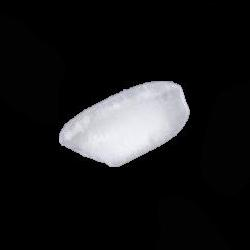

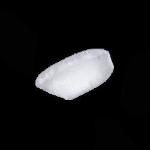

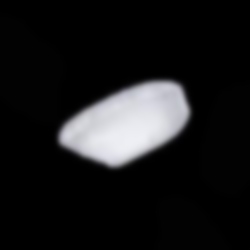

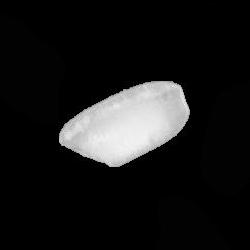

Processing: Arborio (9870).jpg
Original Size: (250, 250)


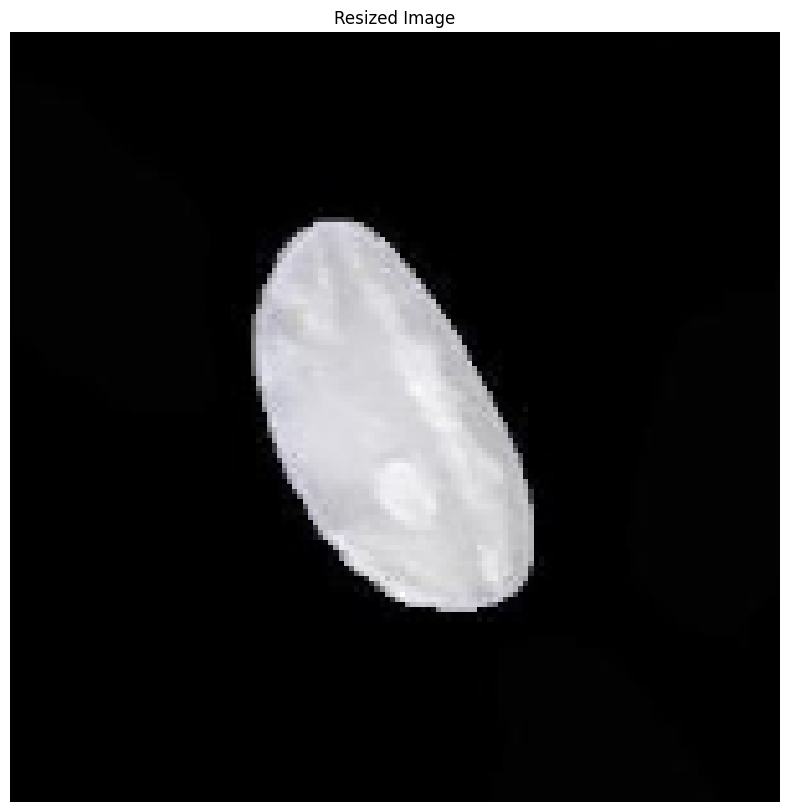

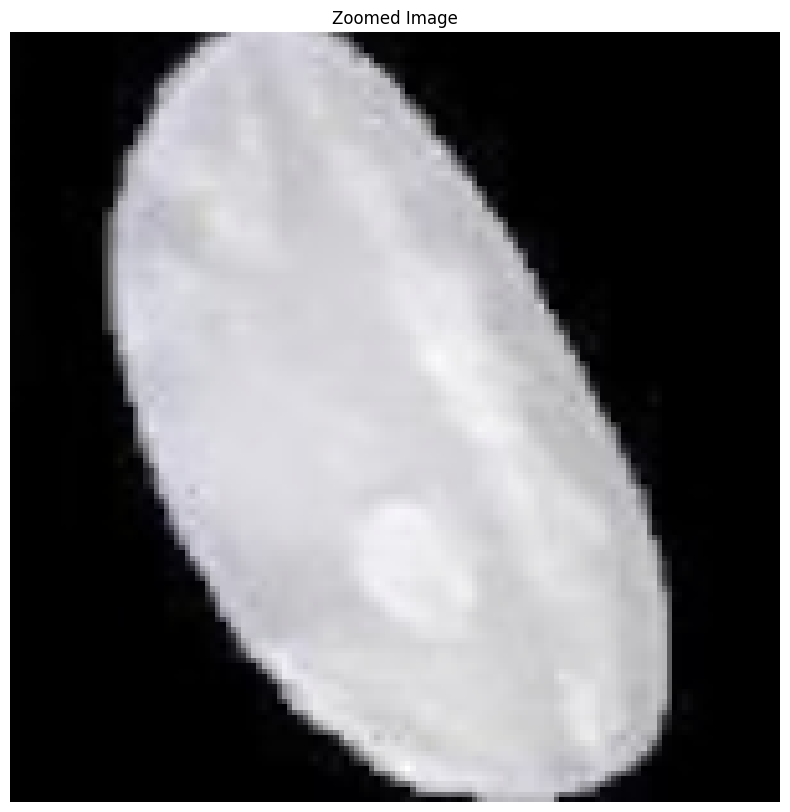

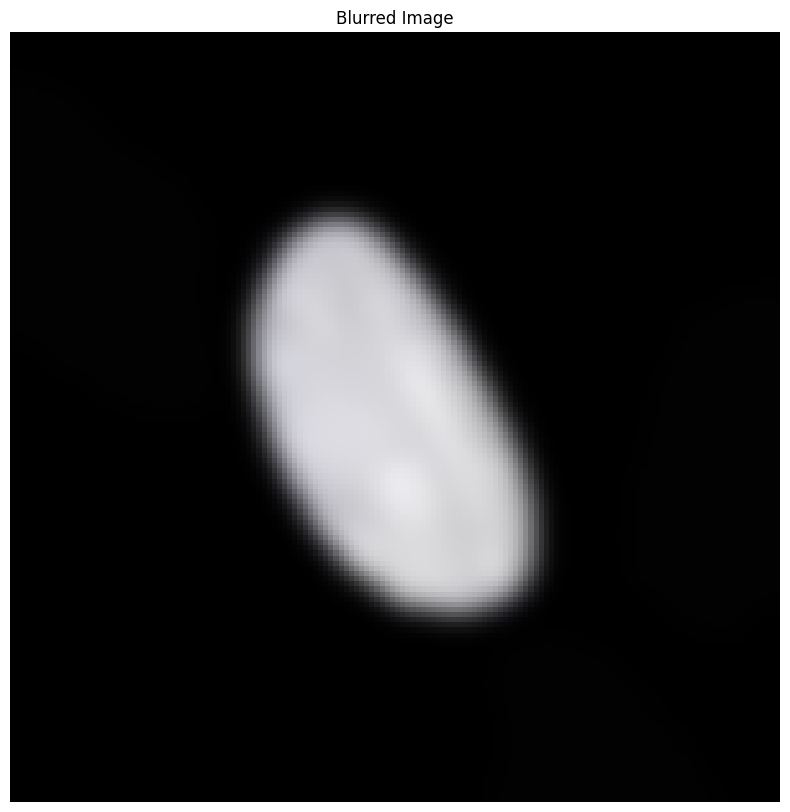

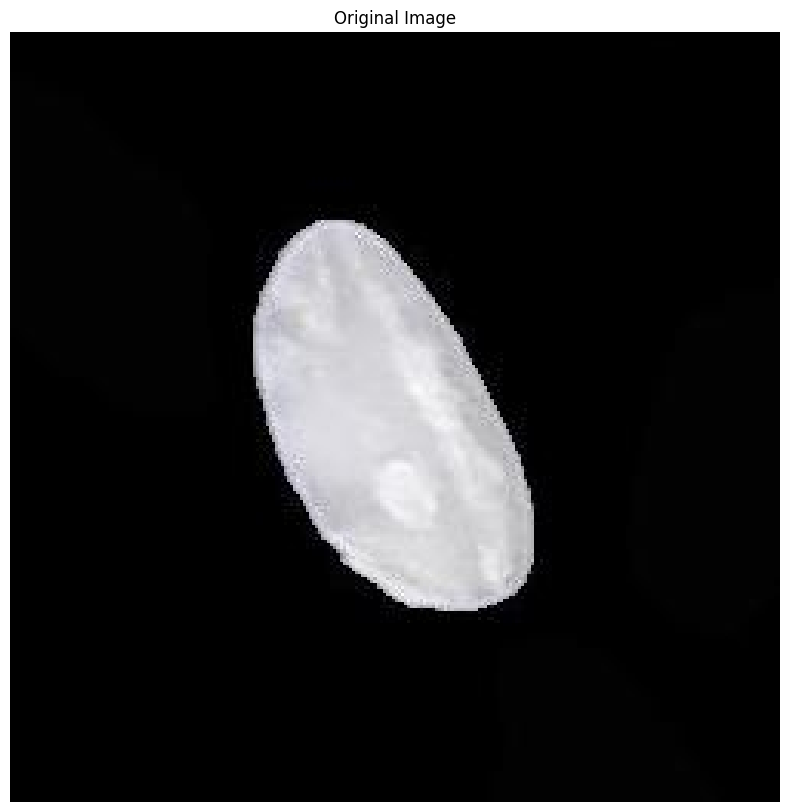

Processing: Arborio (3776).jpg
Original Size: (250, 250)


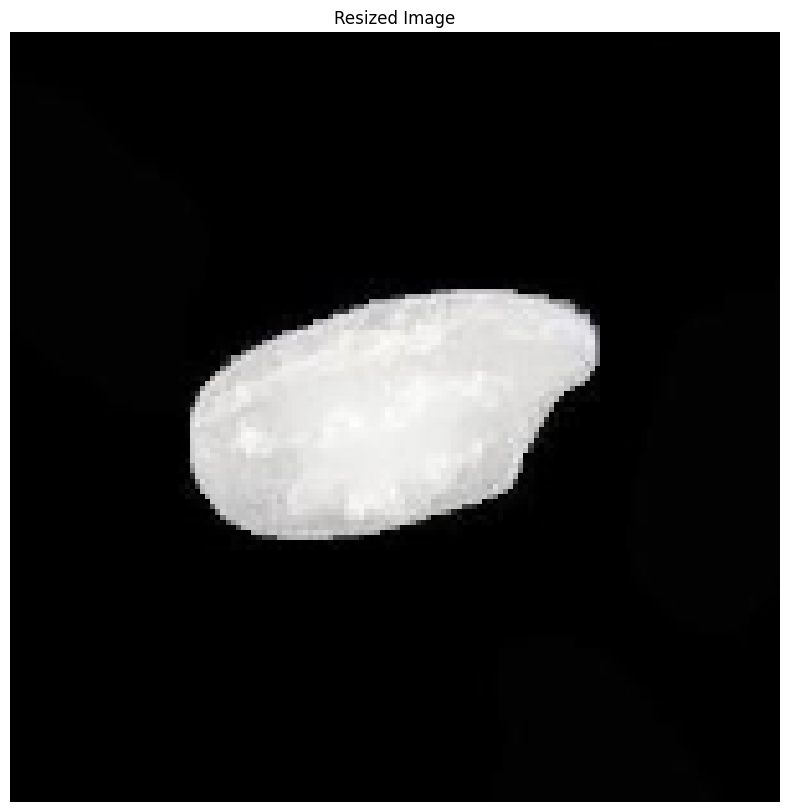

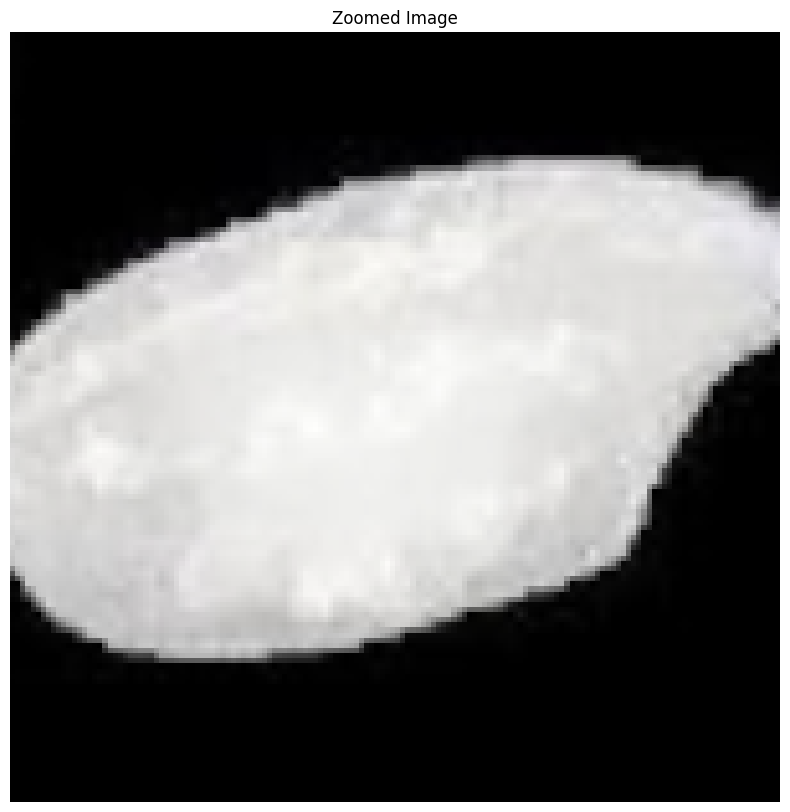

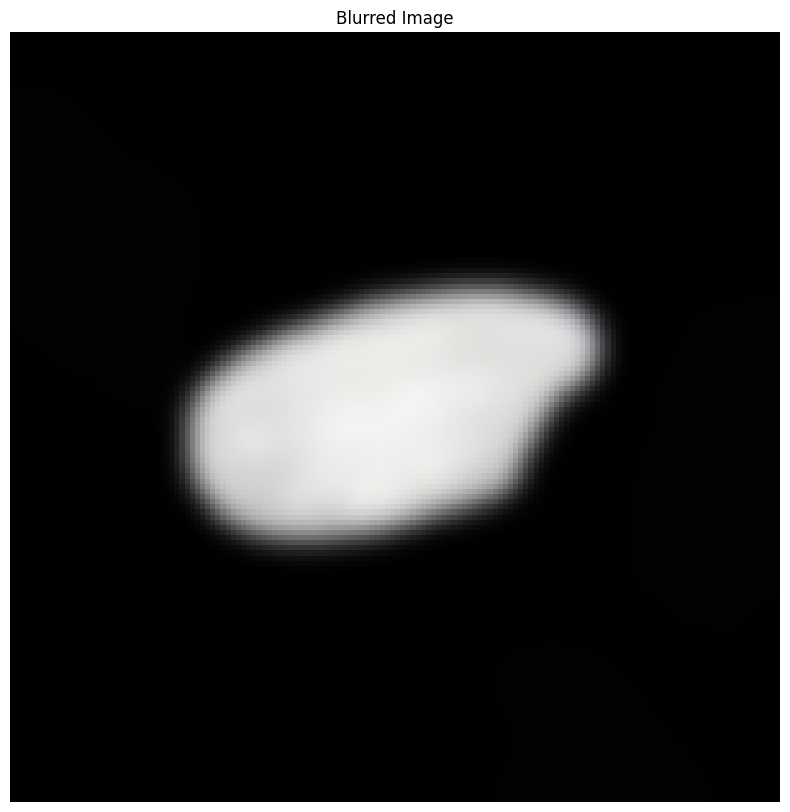

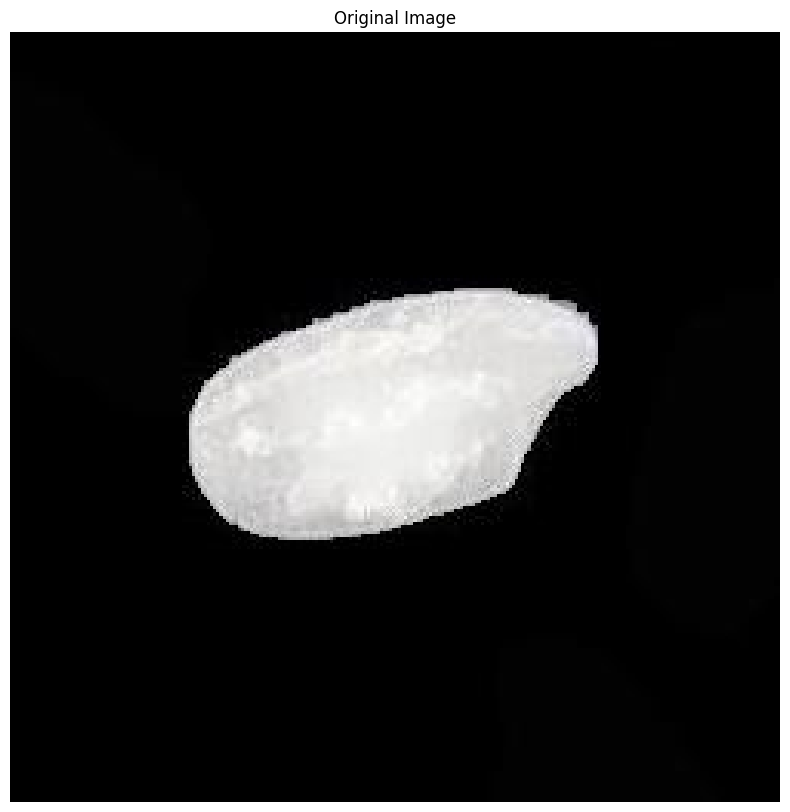

Processing: Arborio (10176).jpg
Original Size: (250, 250)


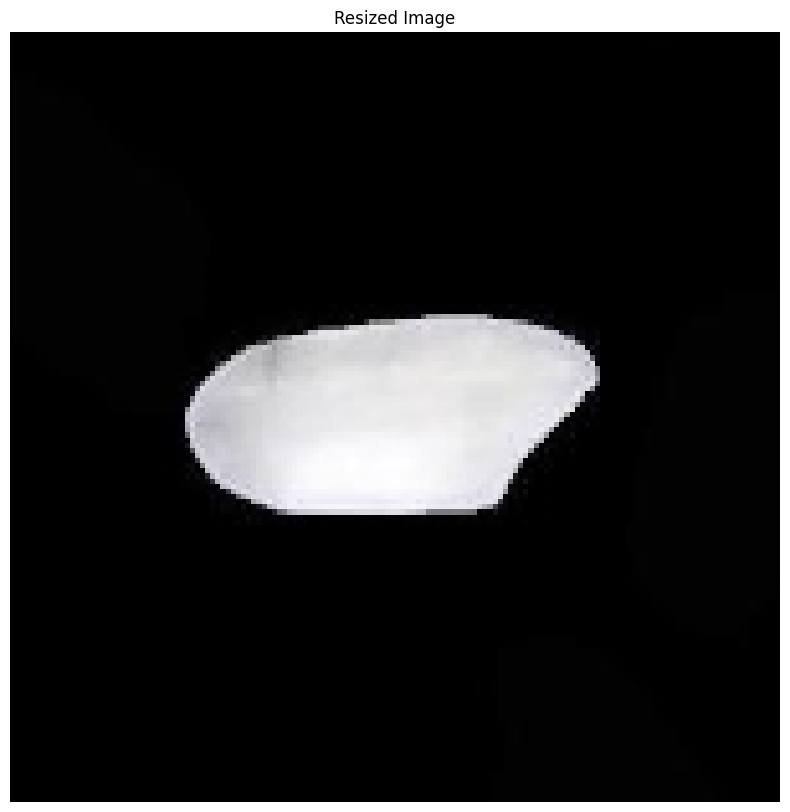

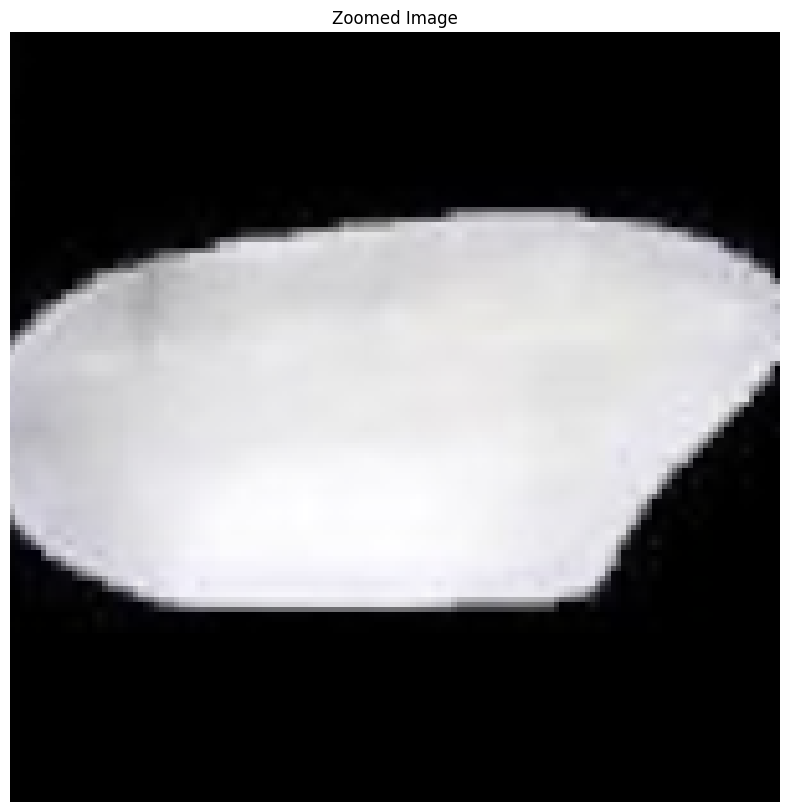

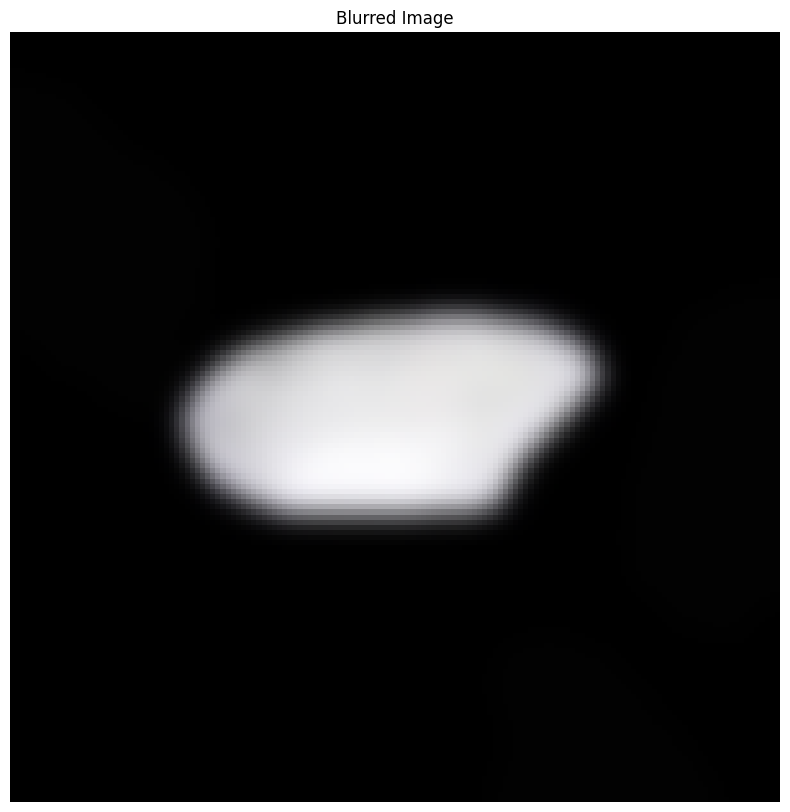

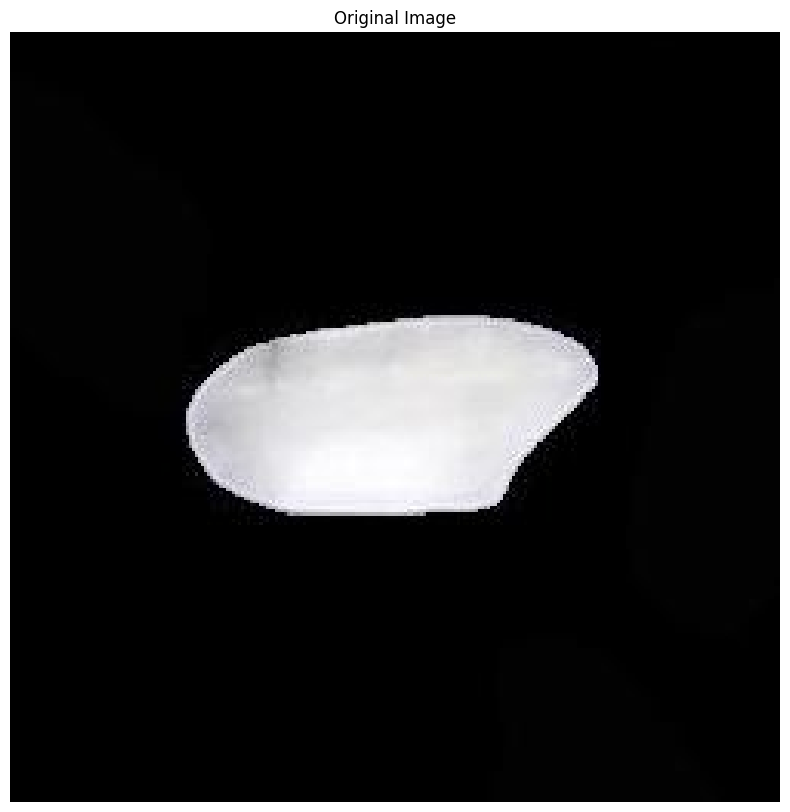

Processing: Arborio (12840).jpg
Original Size: (250, 250)


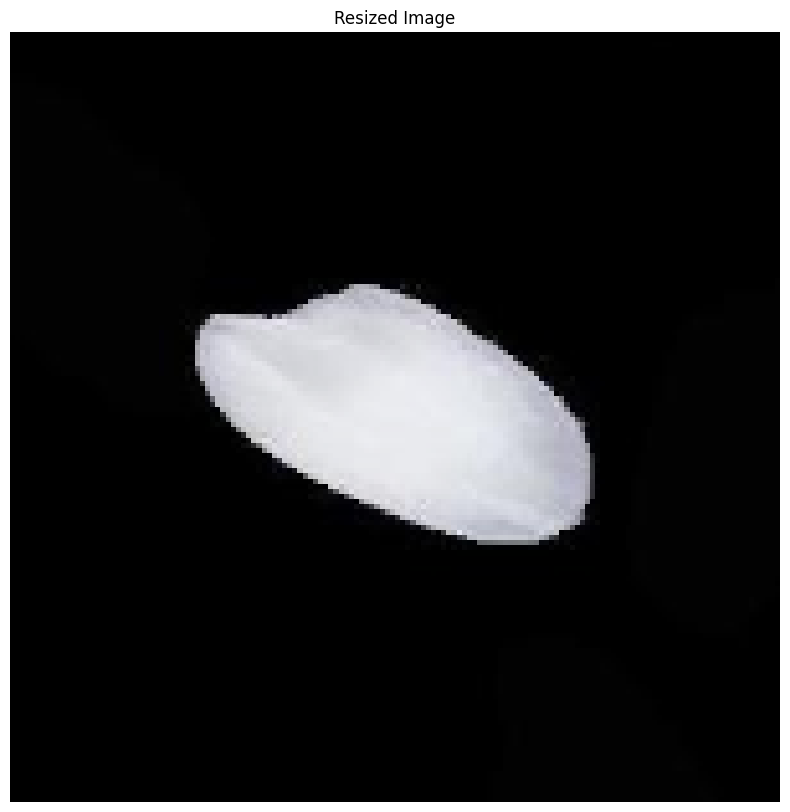

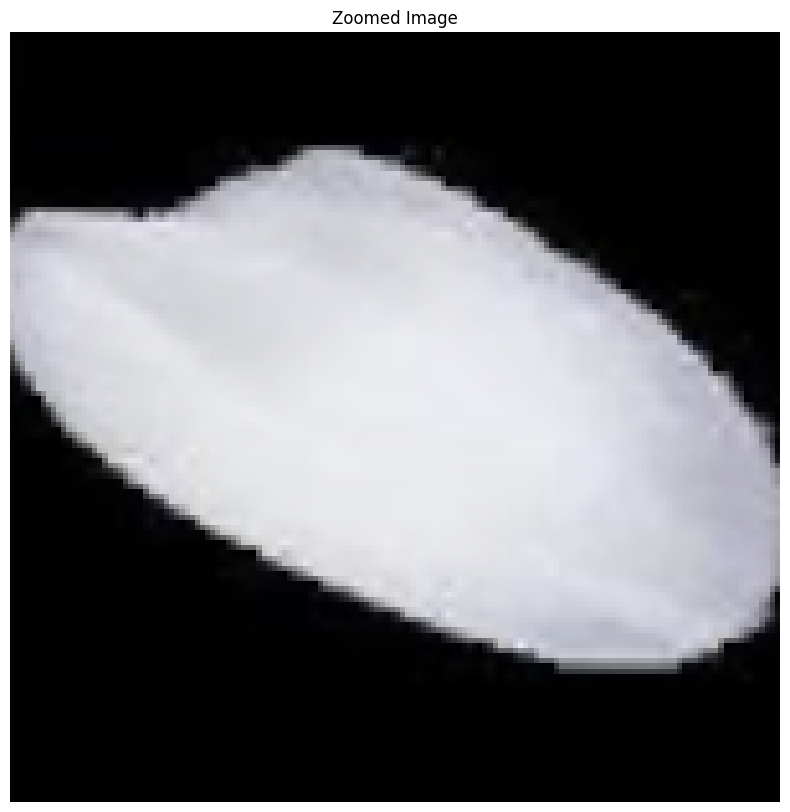

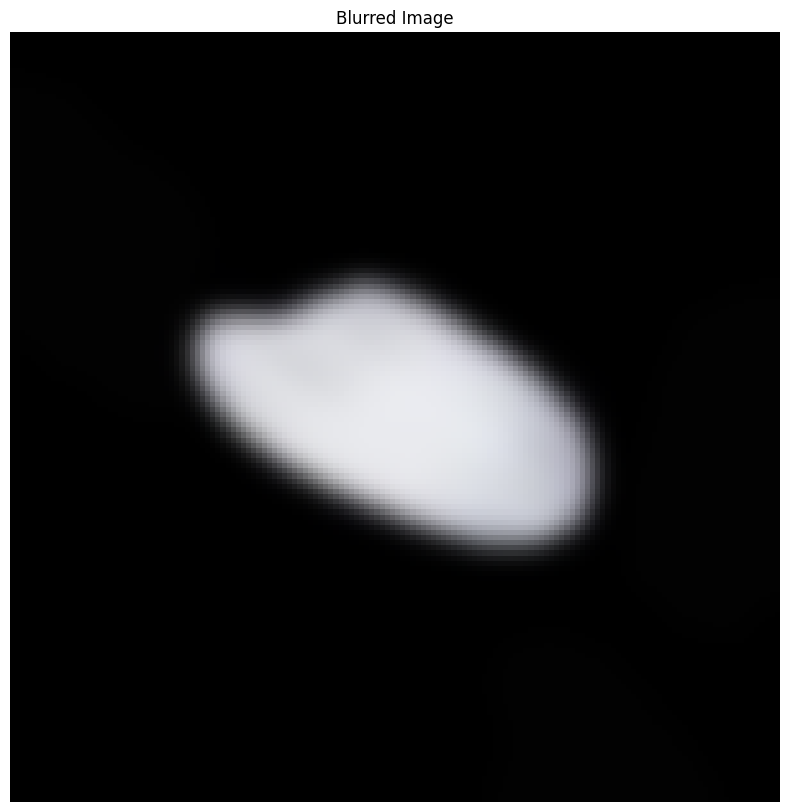

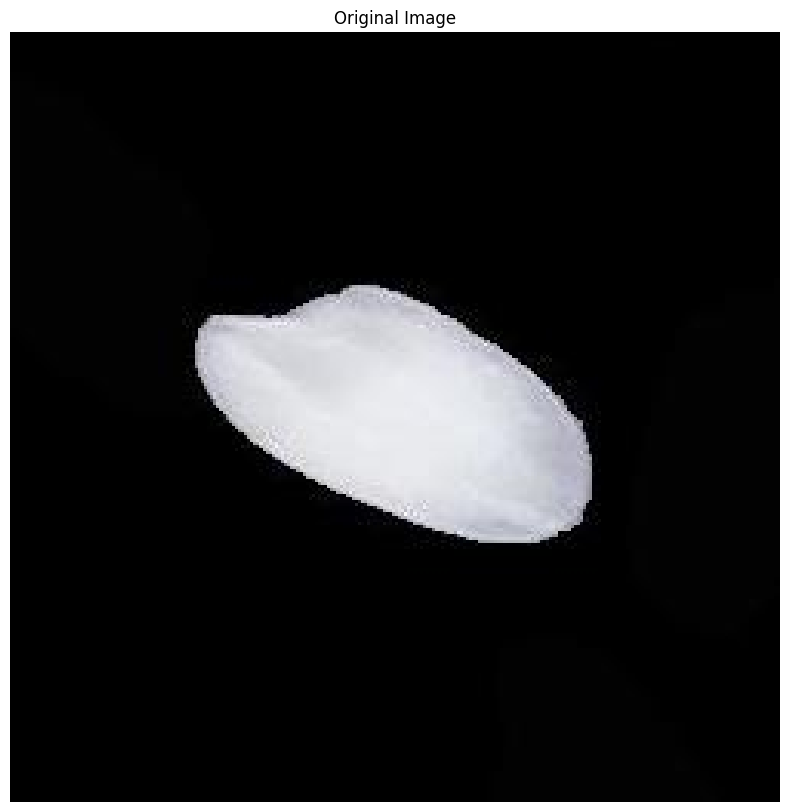

Processing: Arborio (3604).jpg
Original Size: (250, 250)


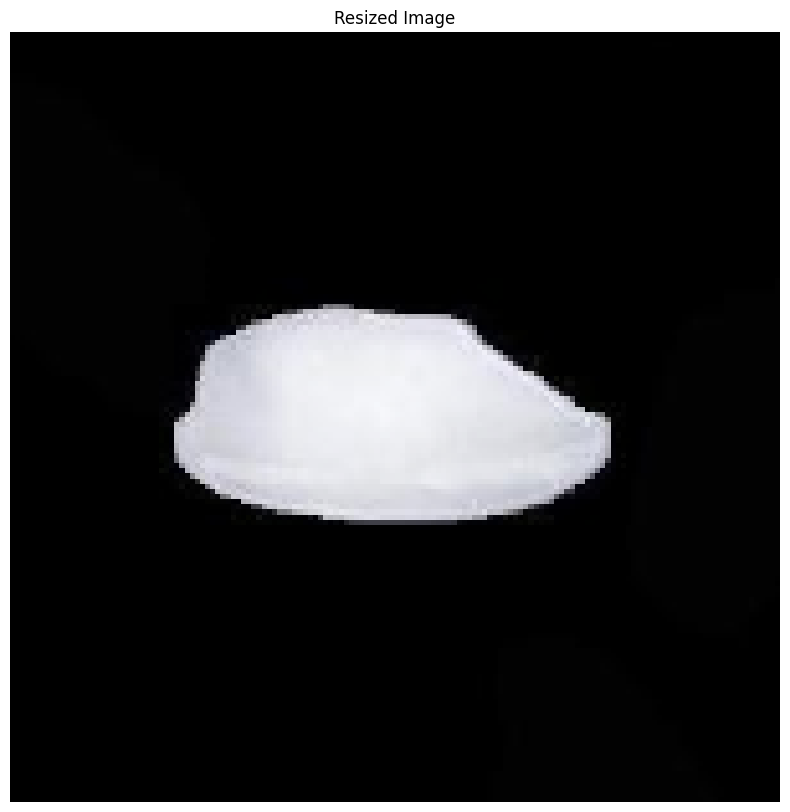

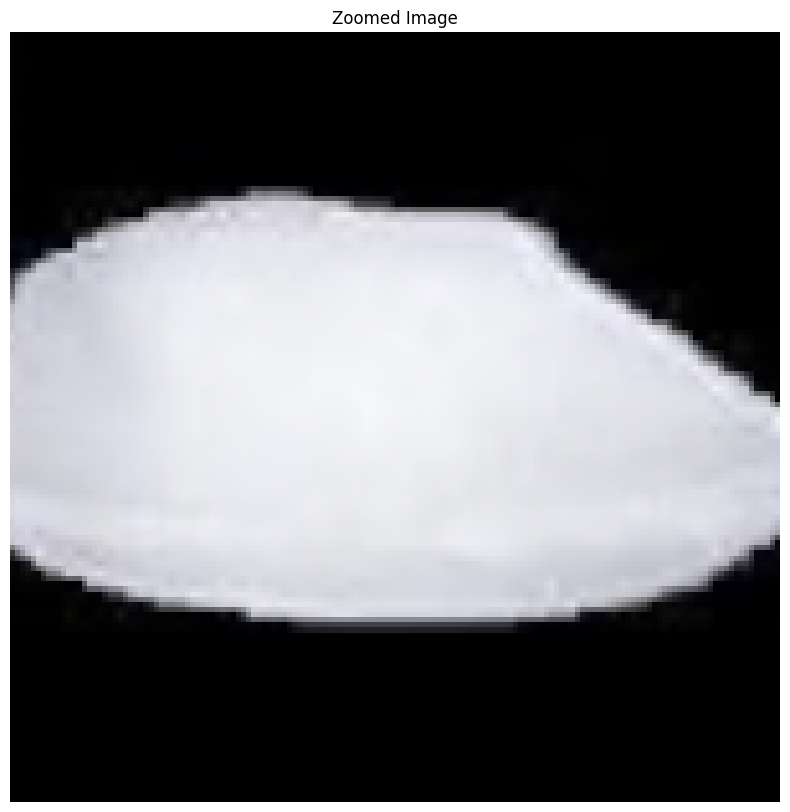

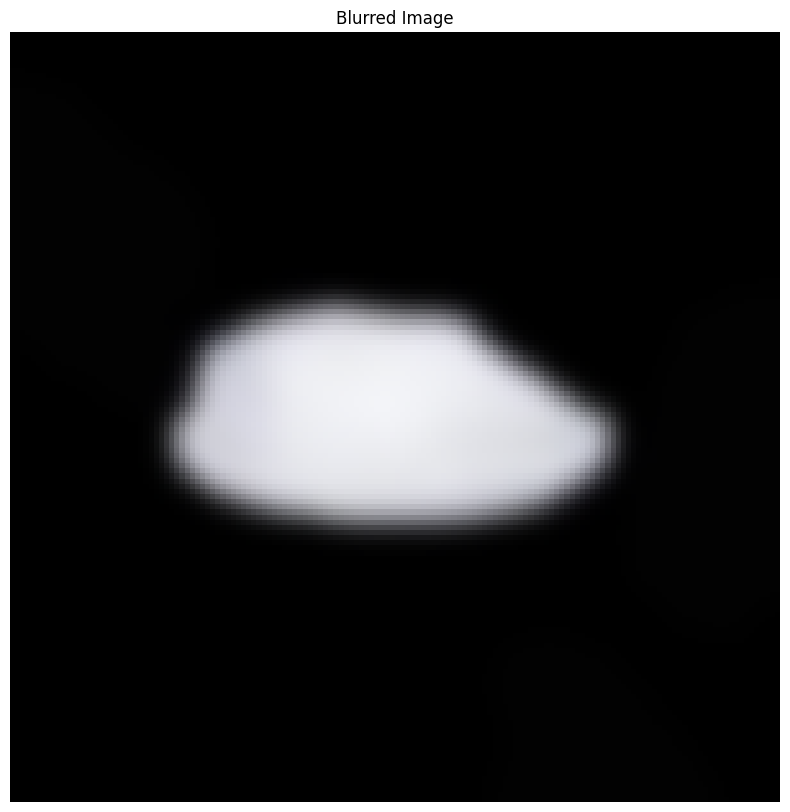

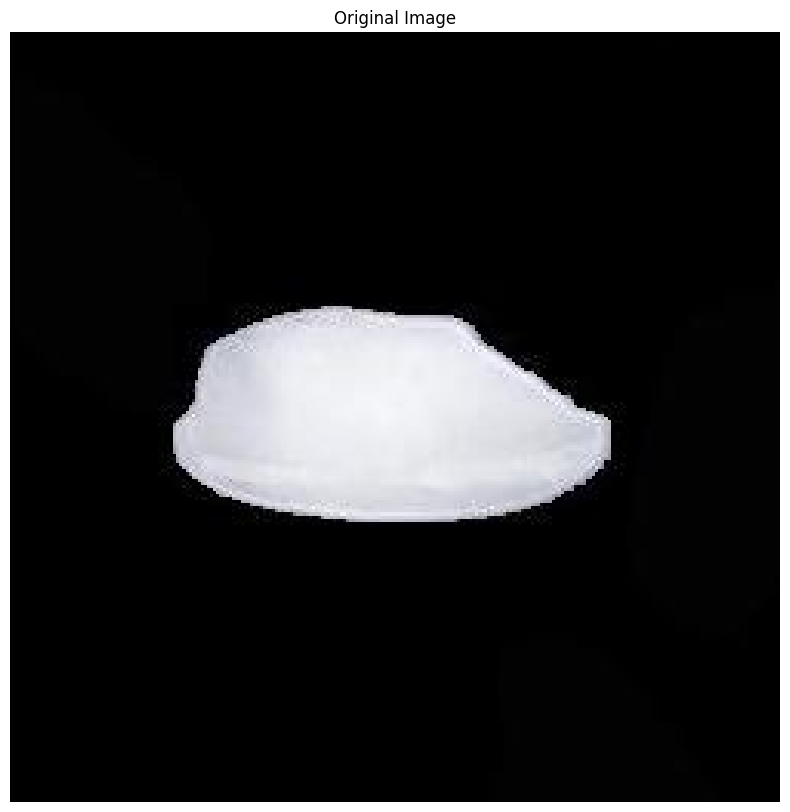

Processing: Arborio (47).jpg
Original Size: (250, 250)


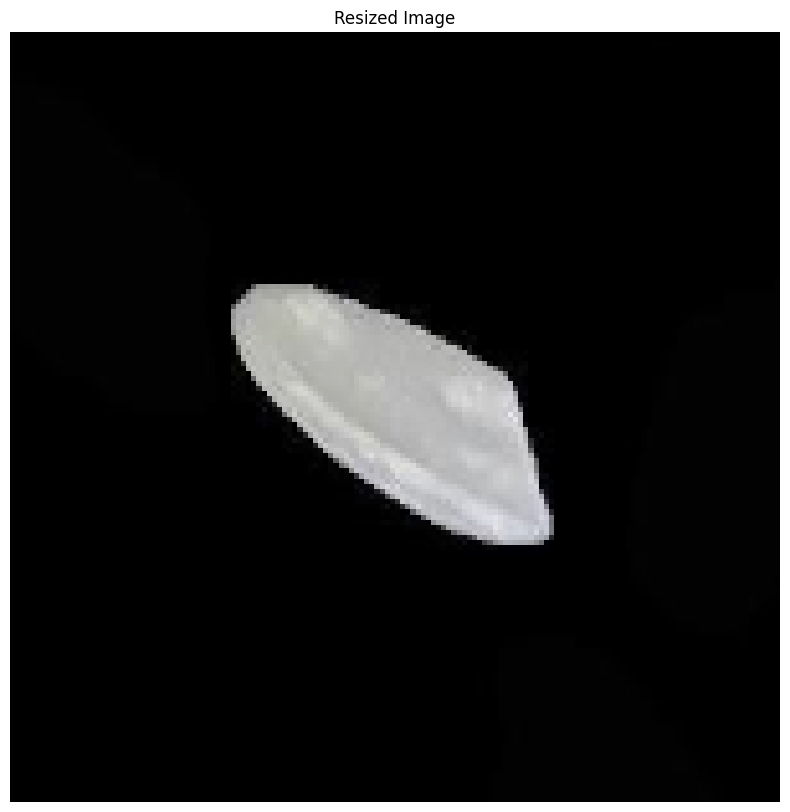

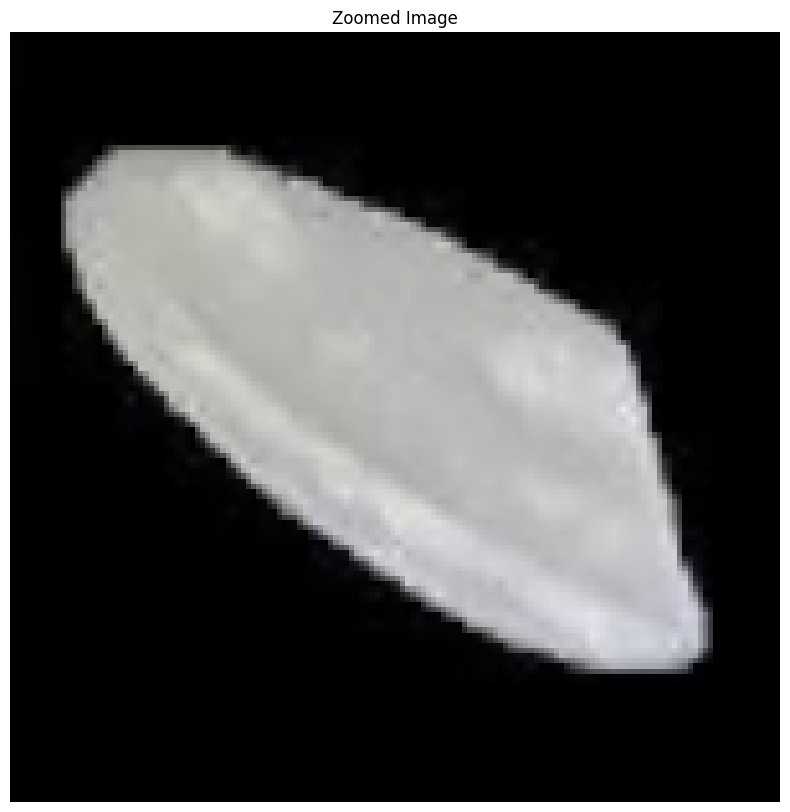

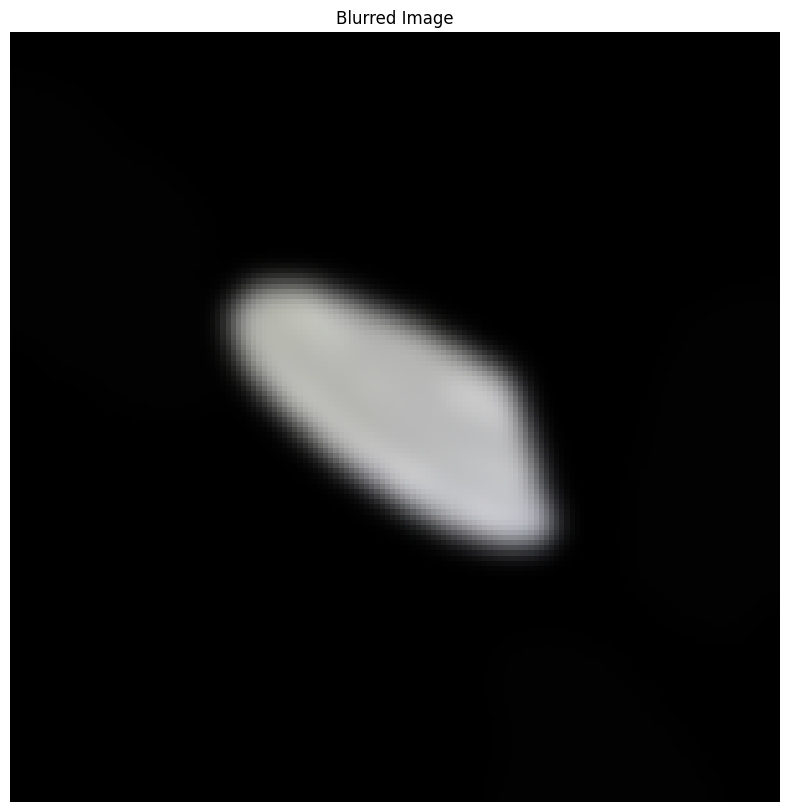

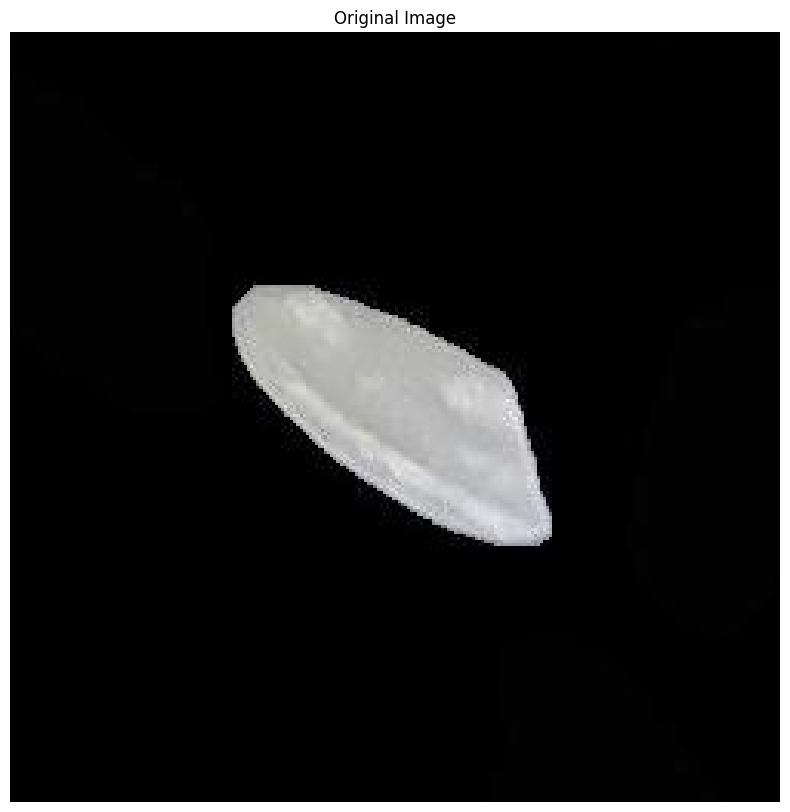

Processing: Arborio (4158).jpg
Original Size: (250, 250)


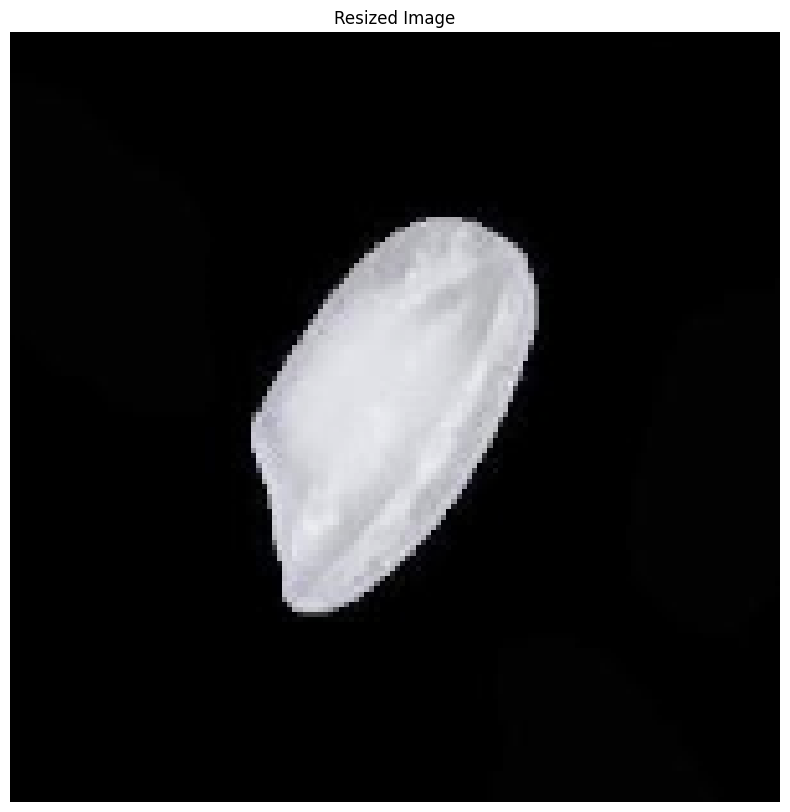

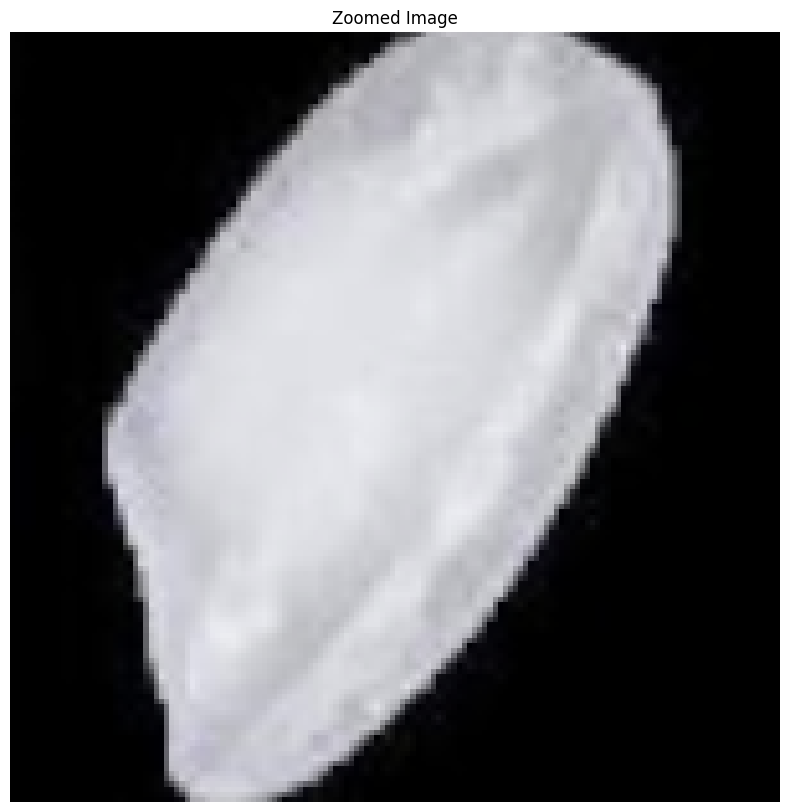

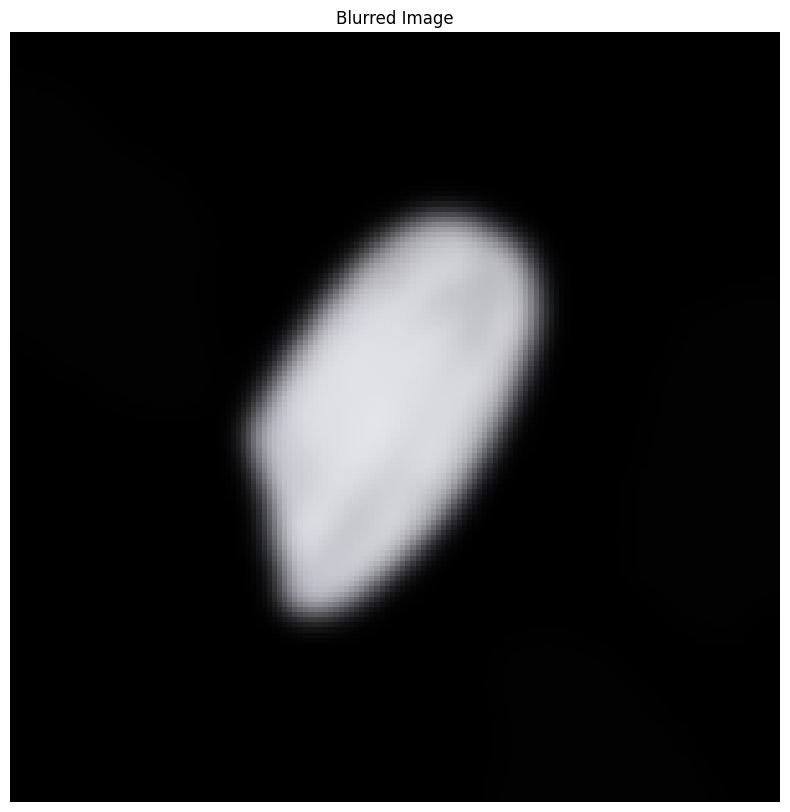

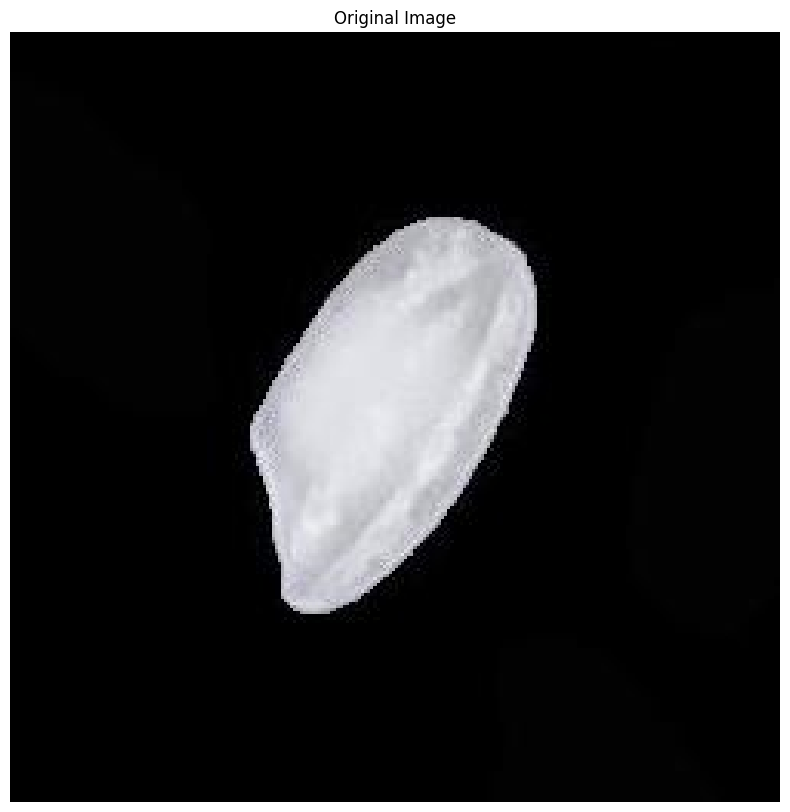

Processing: Arborio (5363).jpg
Original Size: (250, 250)


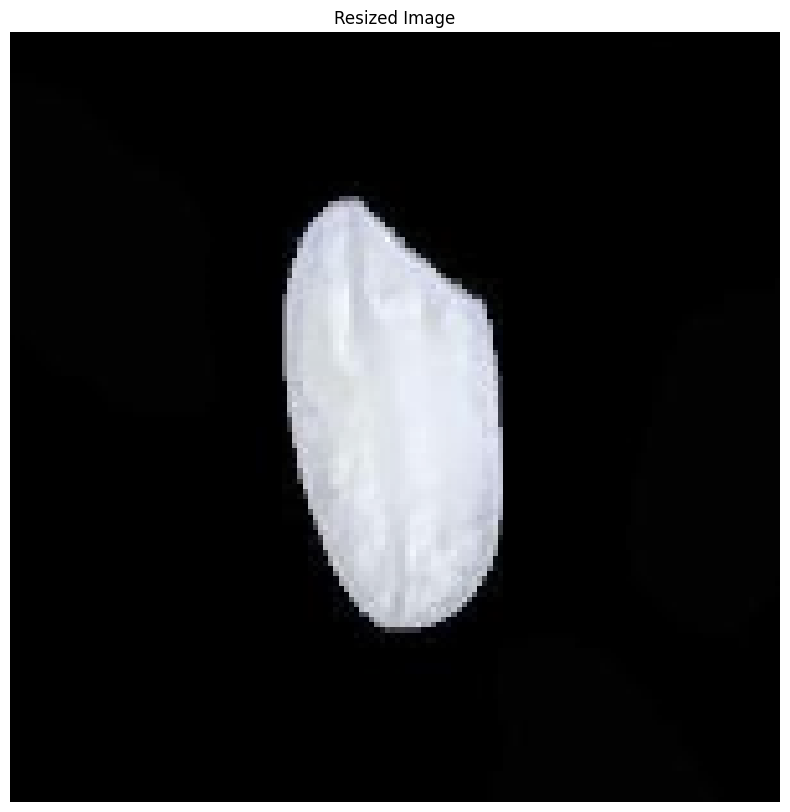

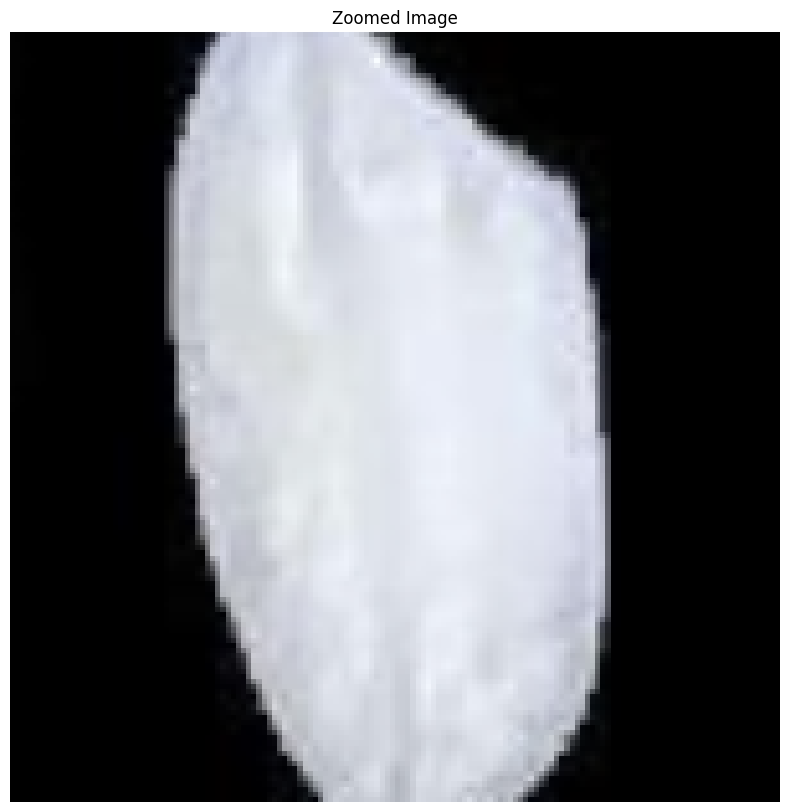

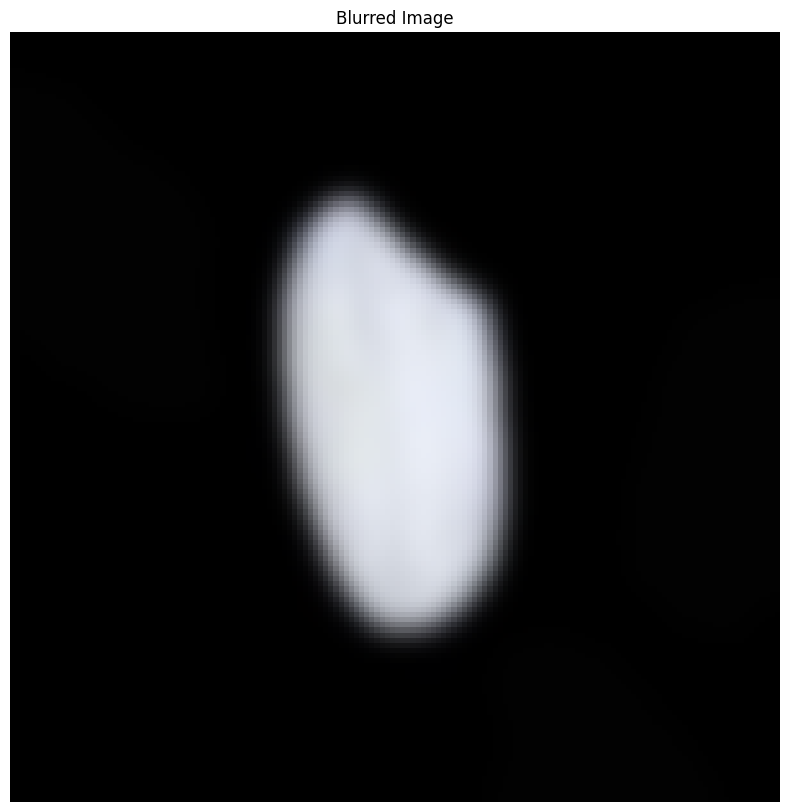

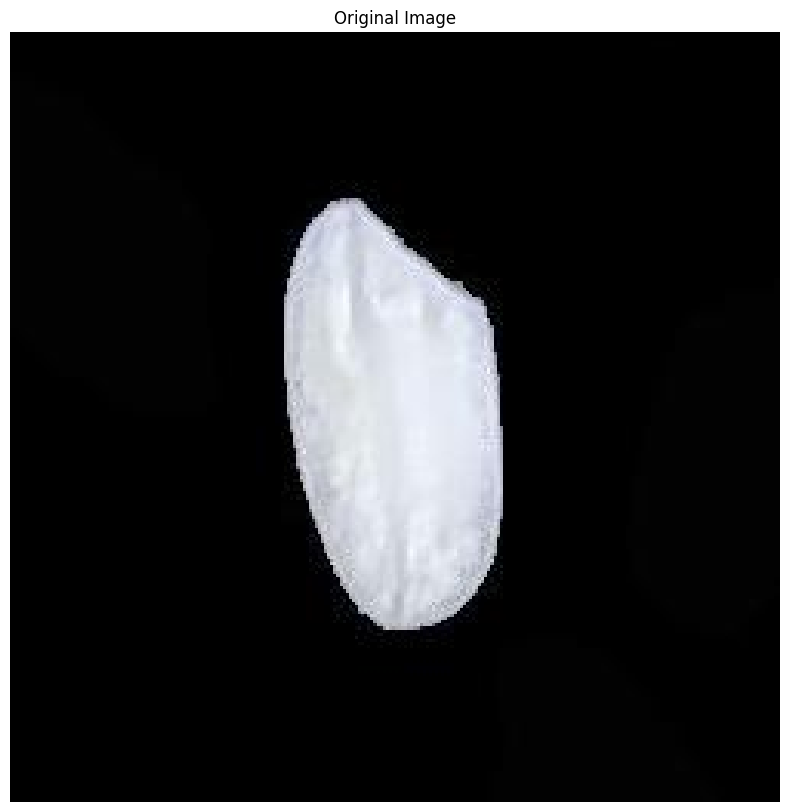

Processing: Arborio (3679).jpg
Original Size: (250, 250)


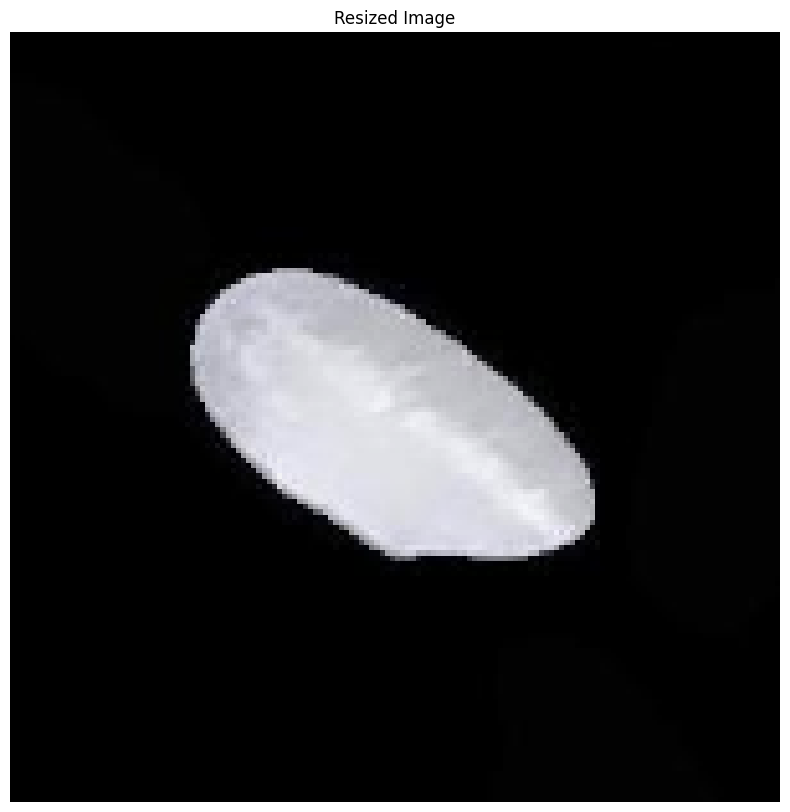

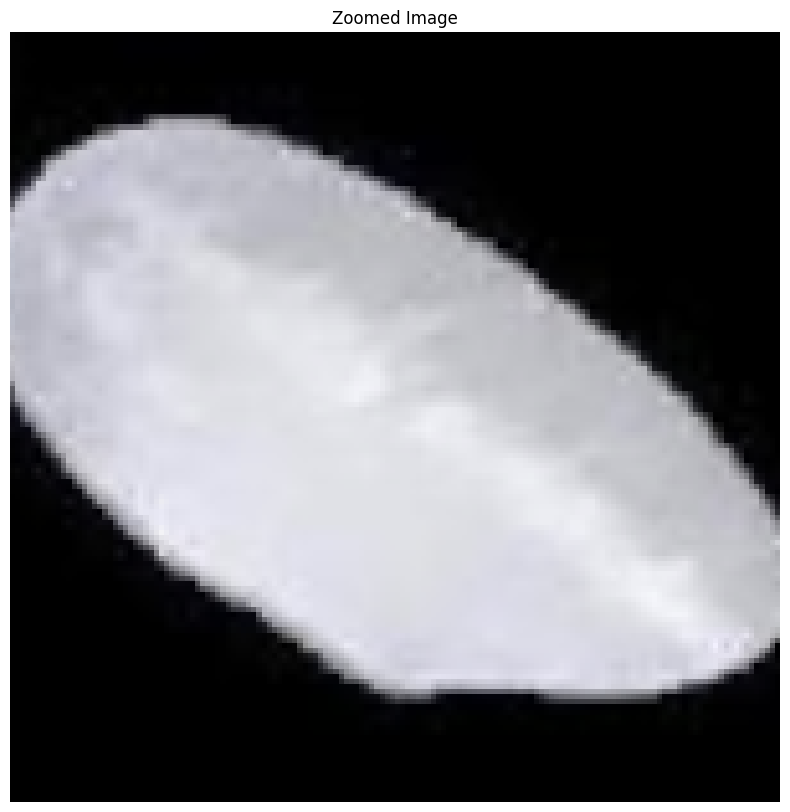

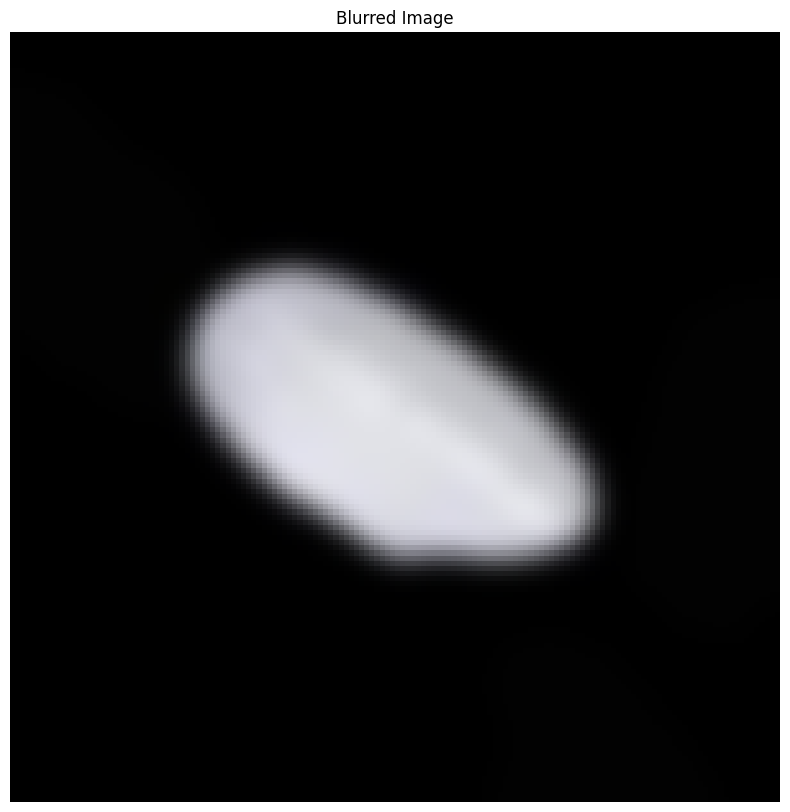

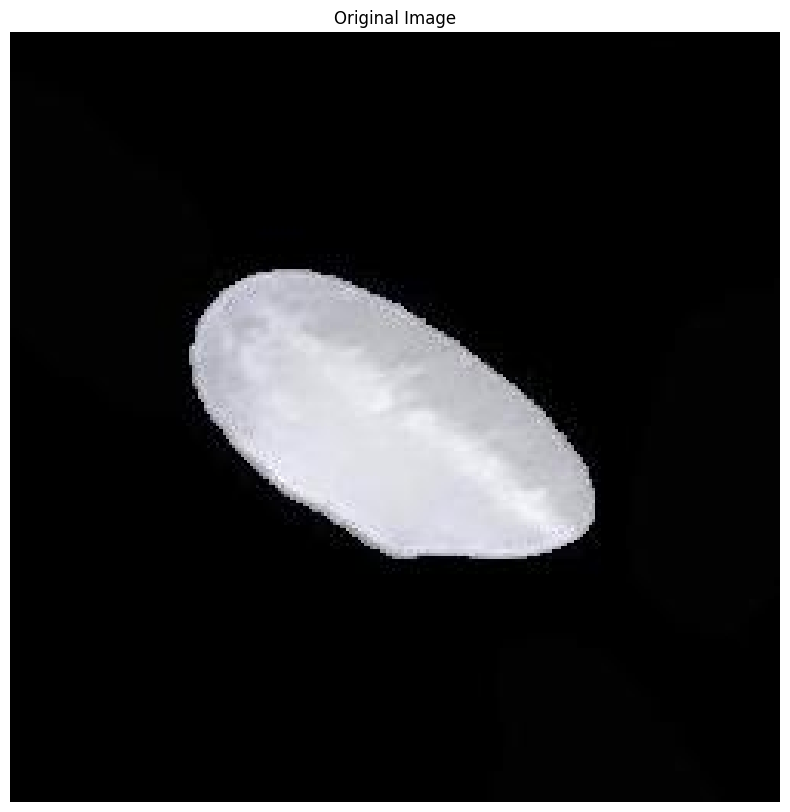

Processing: Arborio (256).jpg
Original Size: (250, 250)


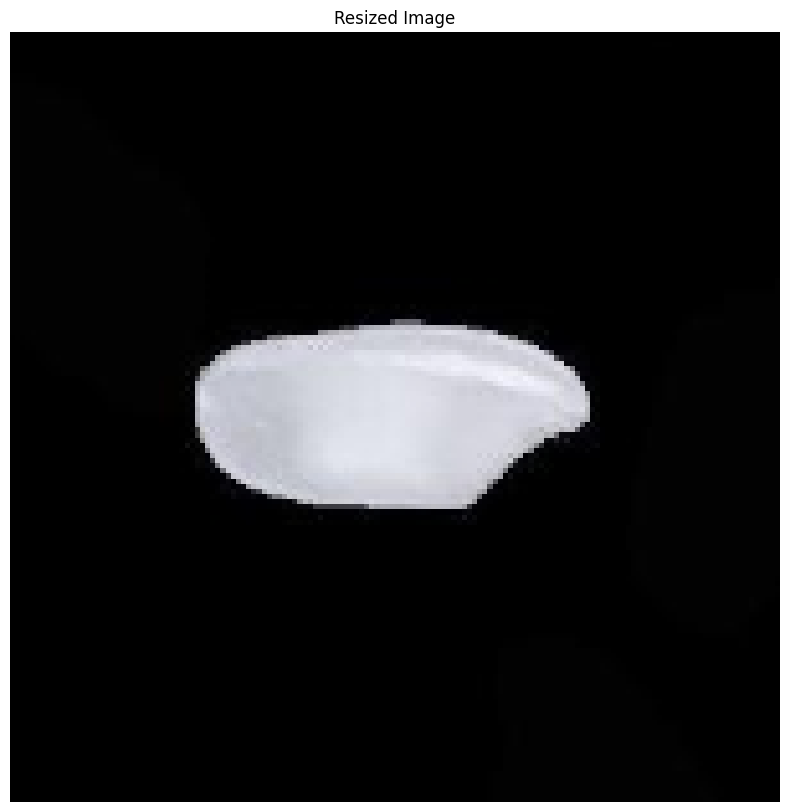

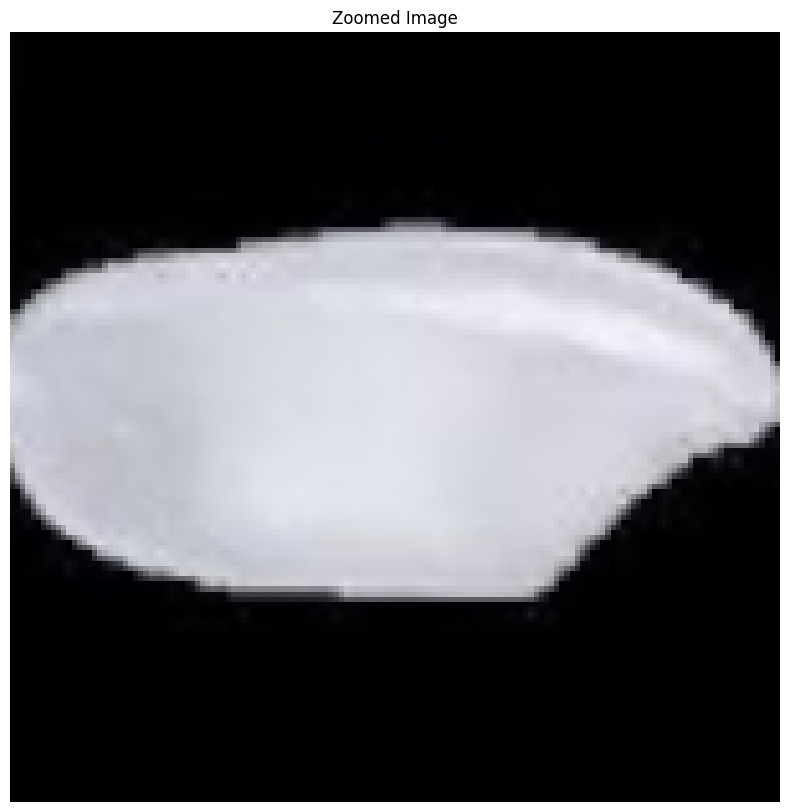

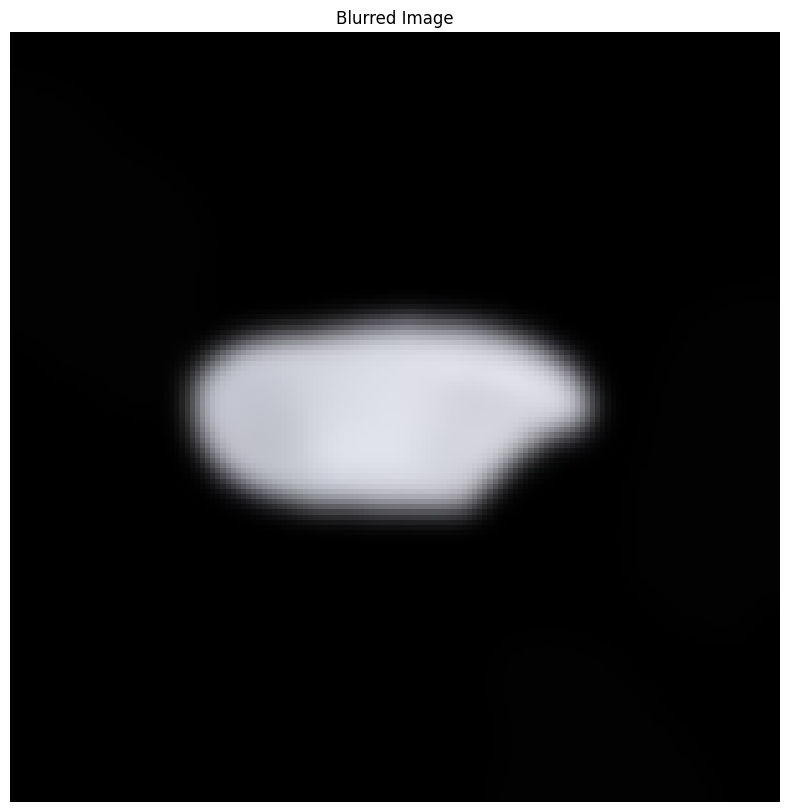

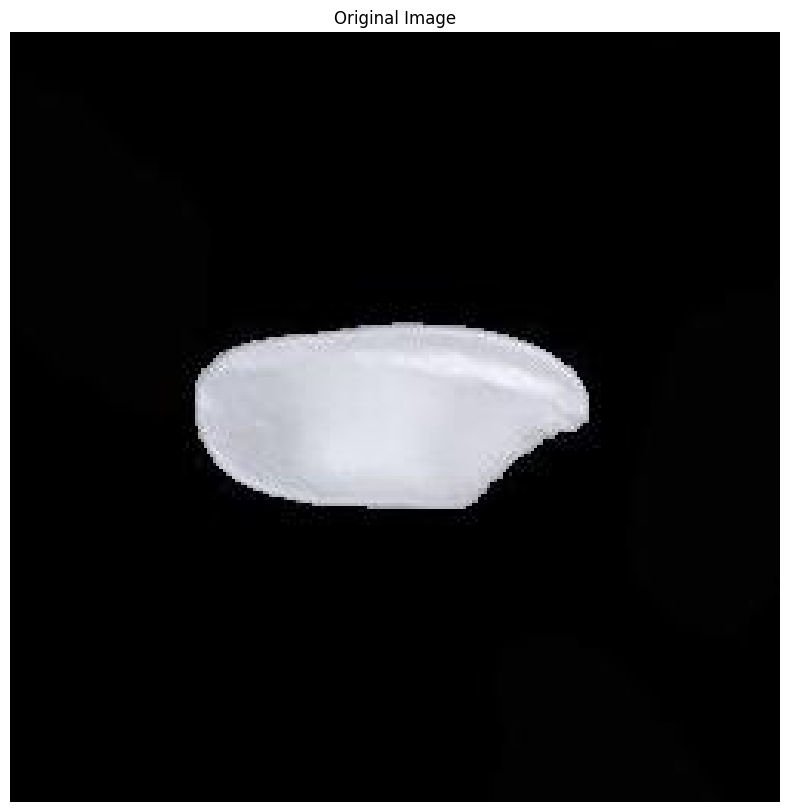

Processing: Arborio (5118).jpg
Original Size: (250, 250)


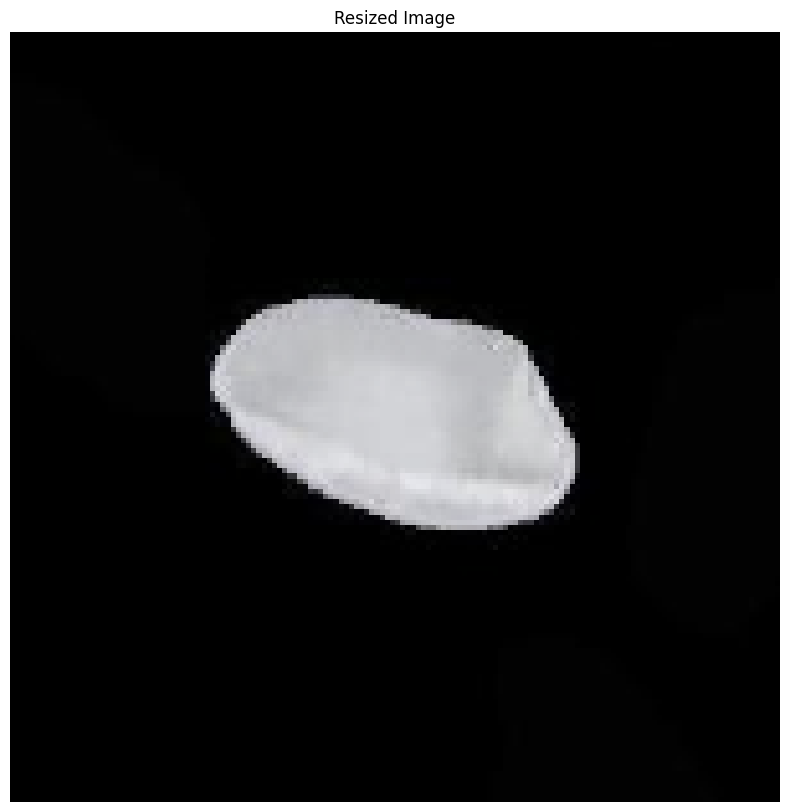

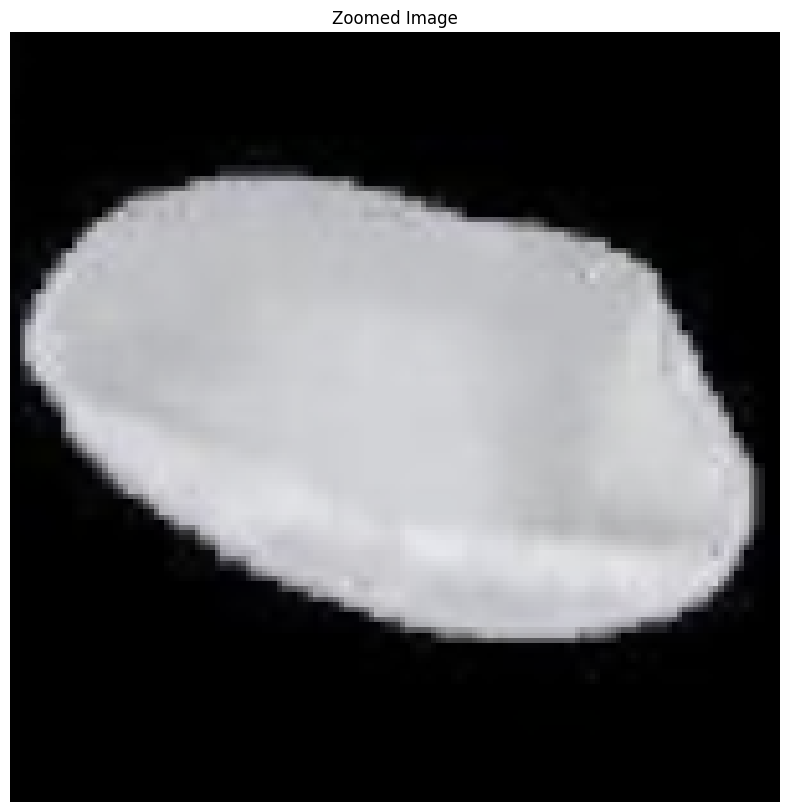

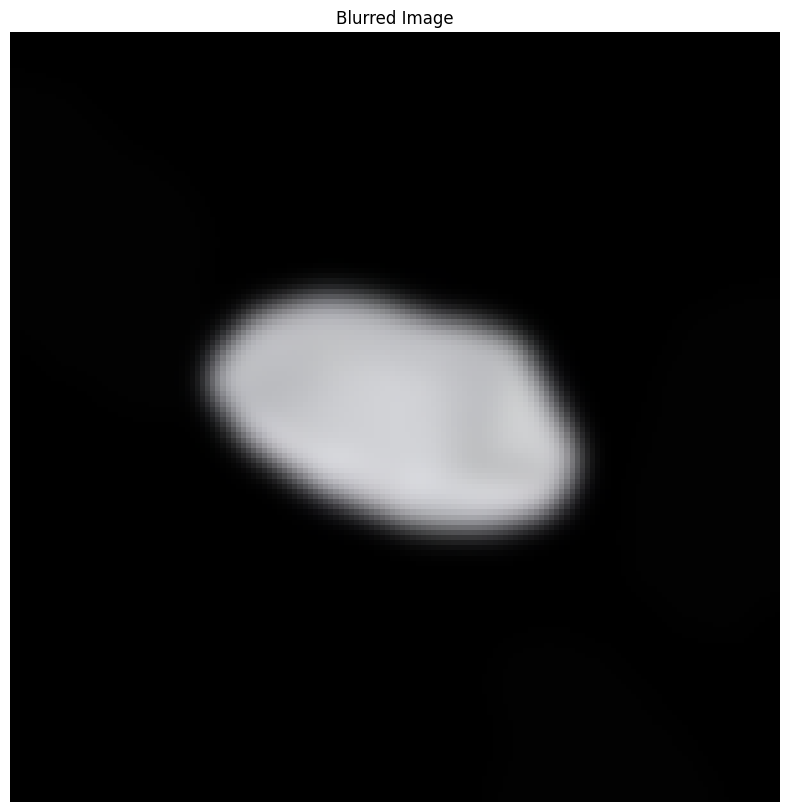

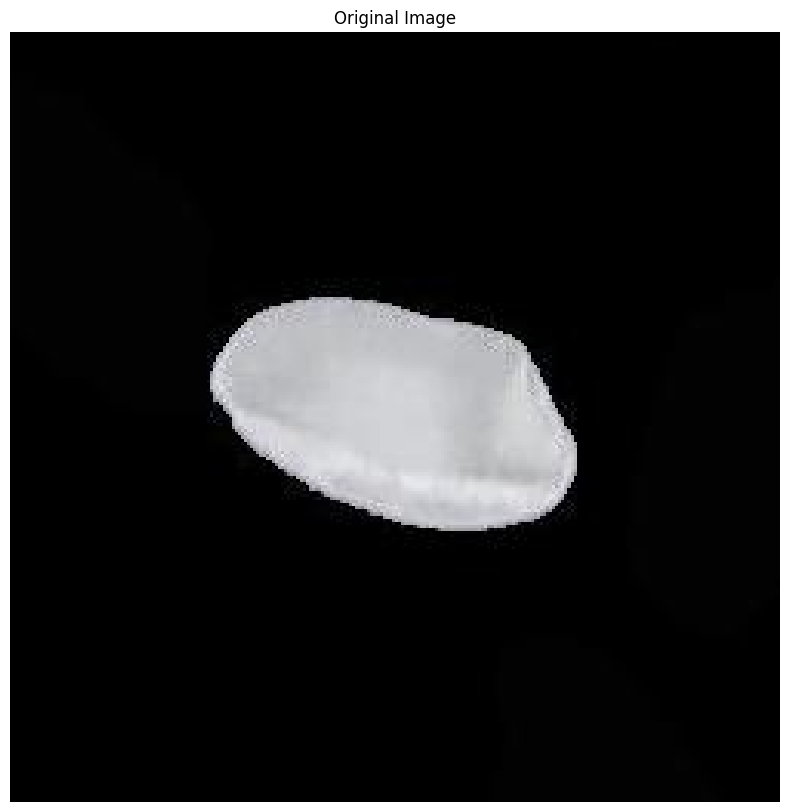

Processing: Arborio (11909).jpg
Original Size: (250, 250)


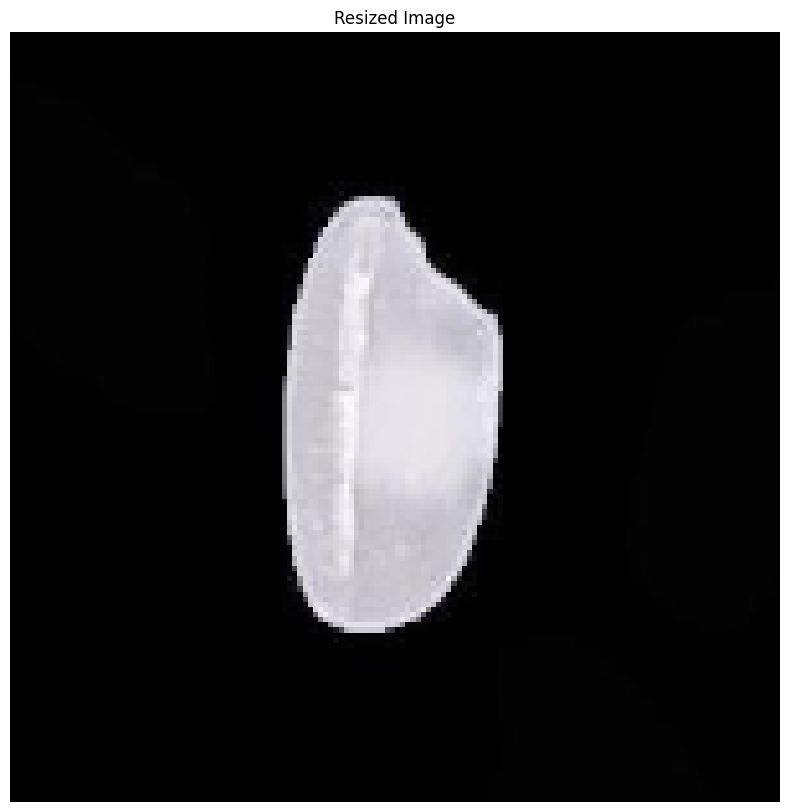

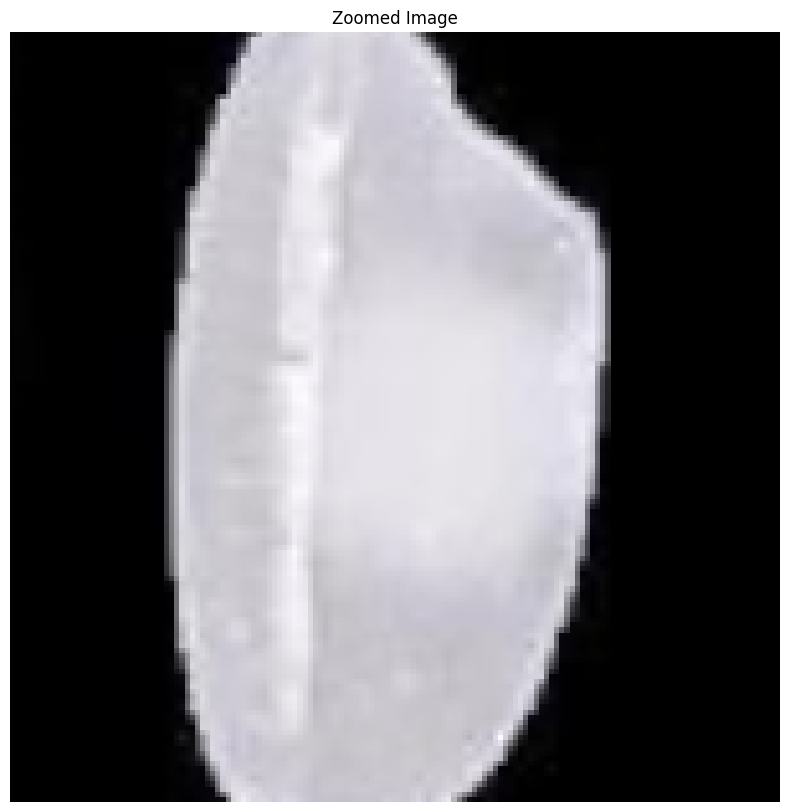

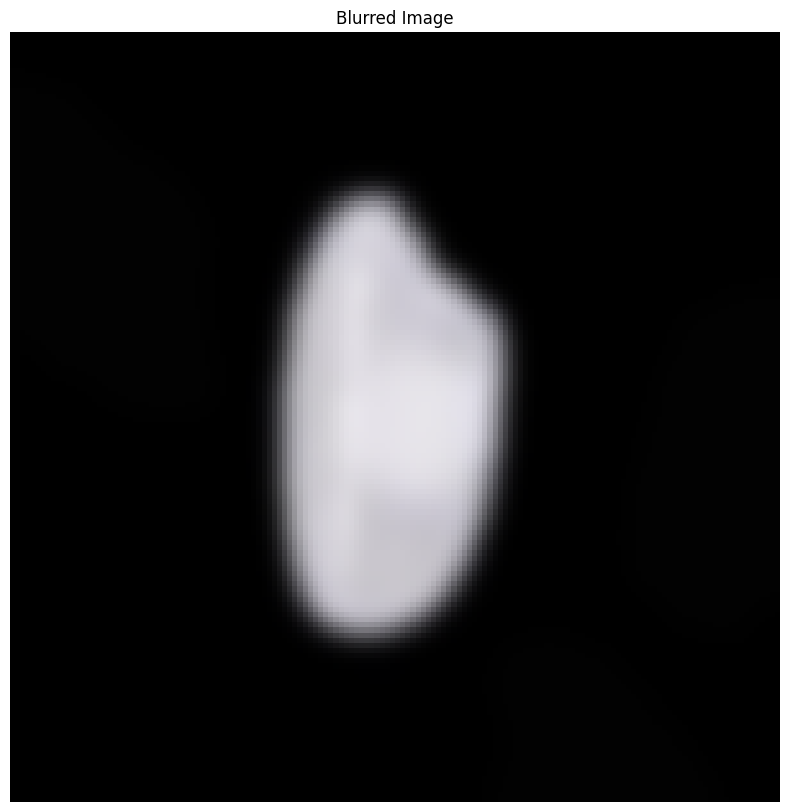

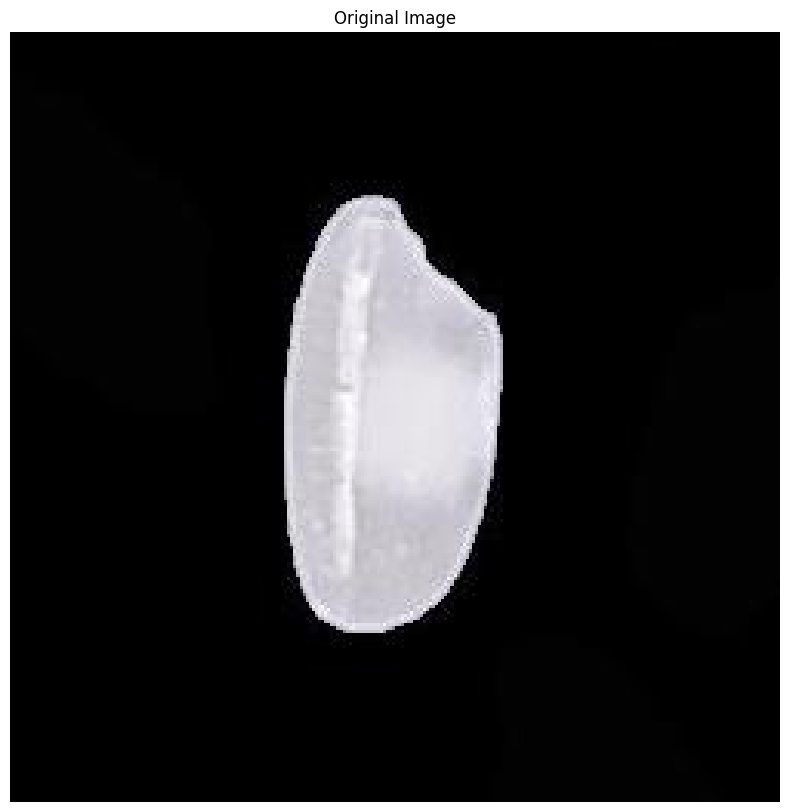

Processing: Arborio (3559).jpg
Original Size: (250, 250)


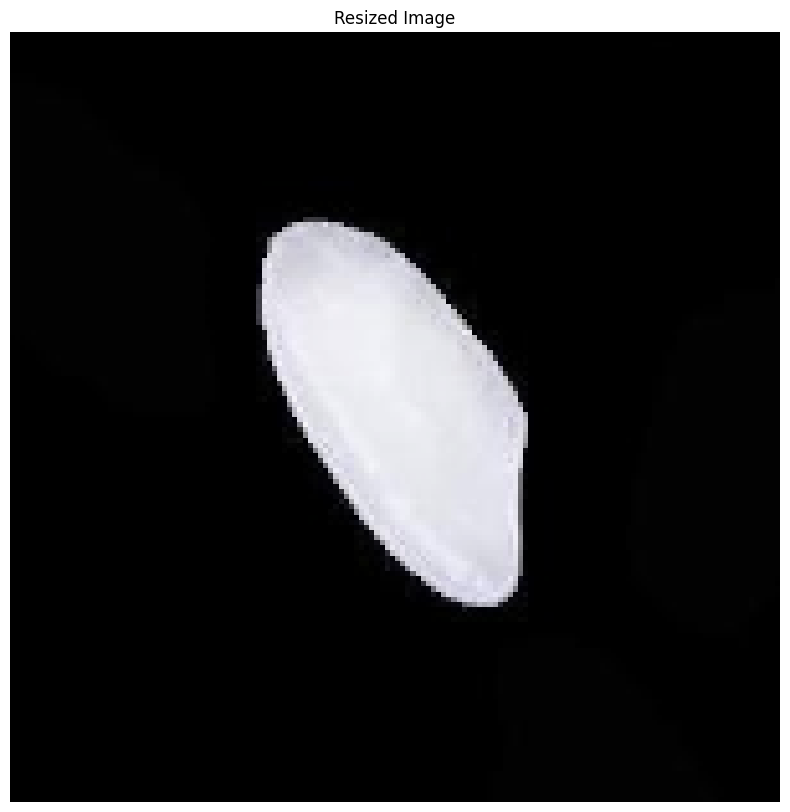

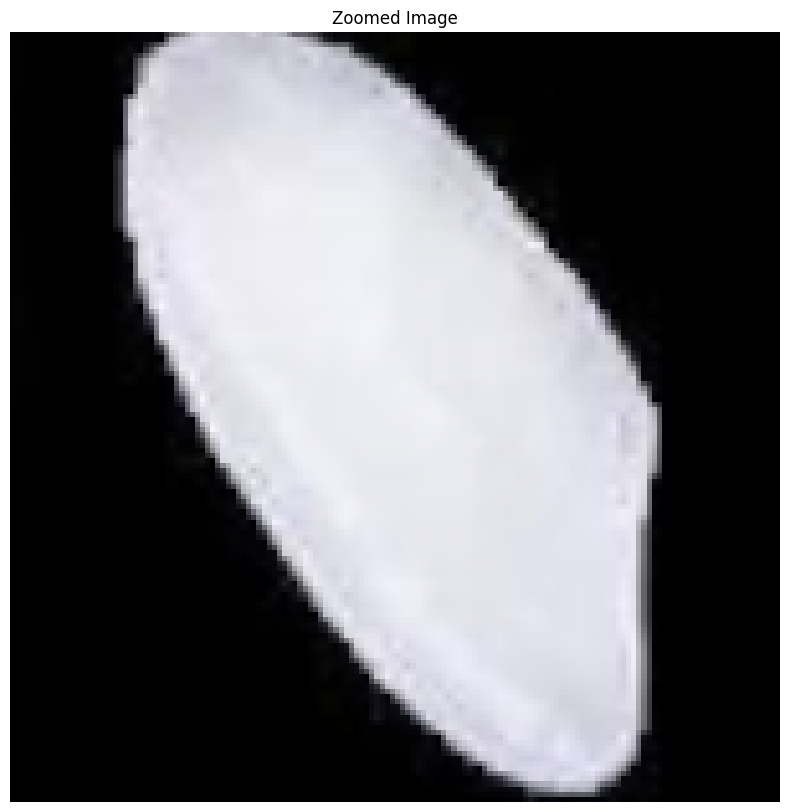

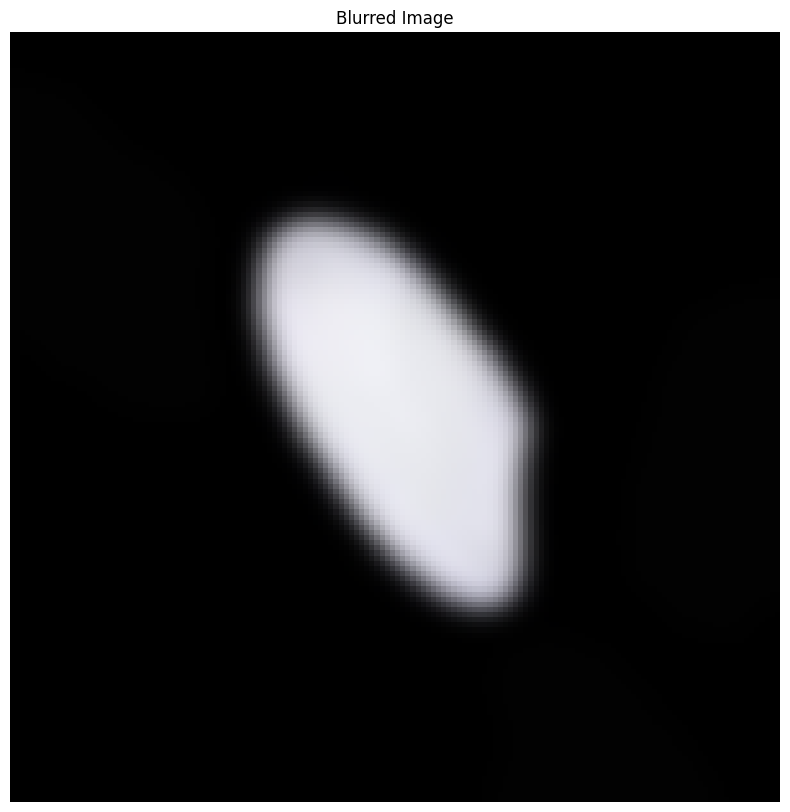

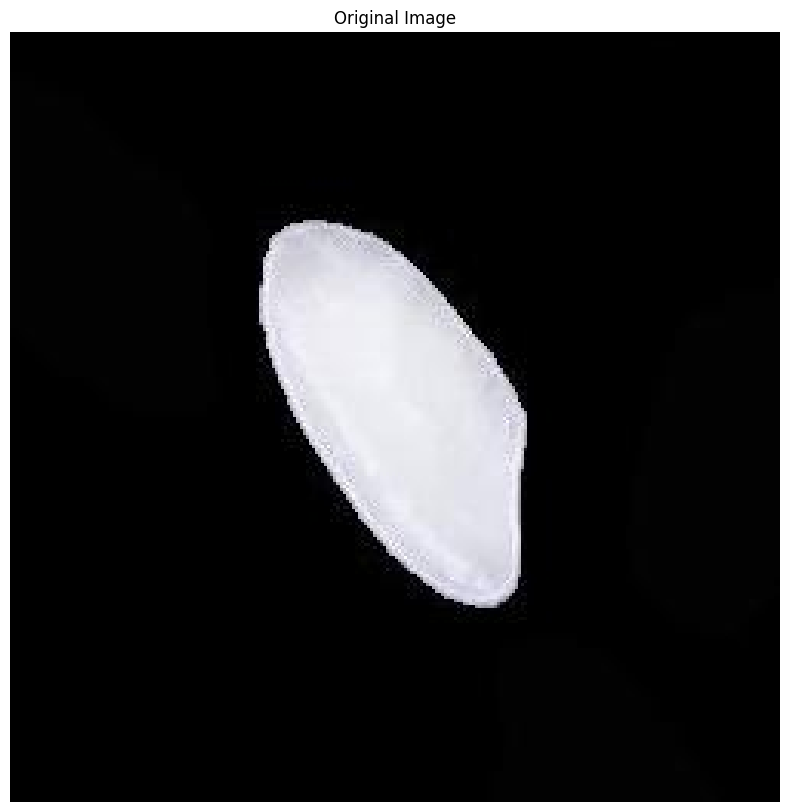

Processing: Arborio (4149).jpg
Original Size: (250, 250)


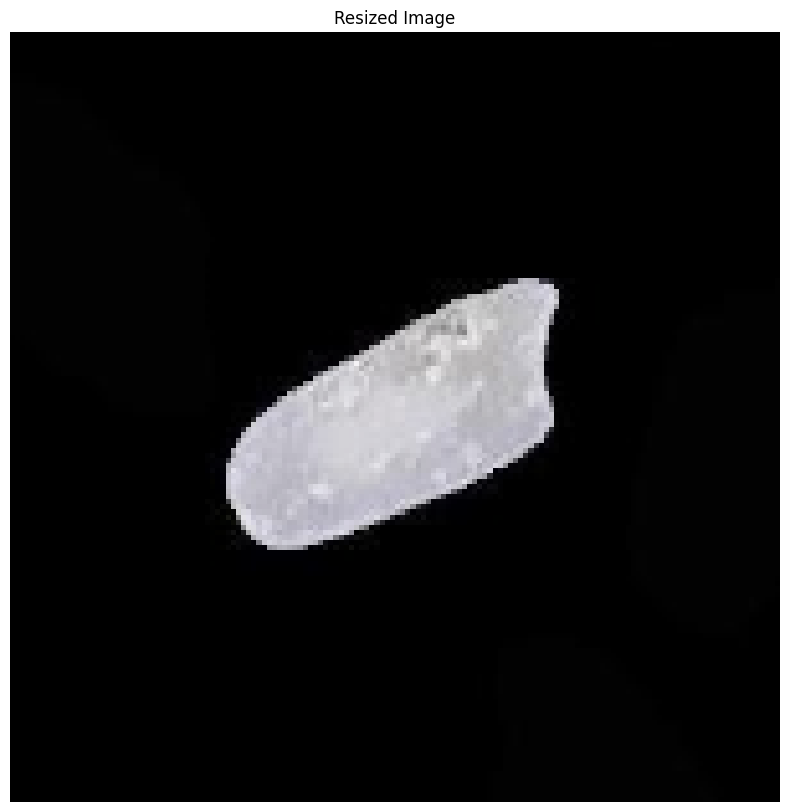

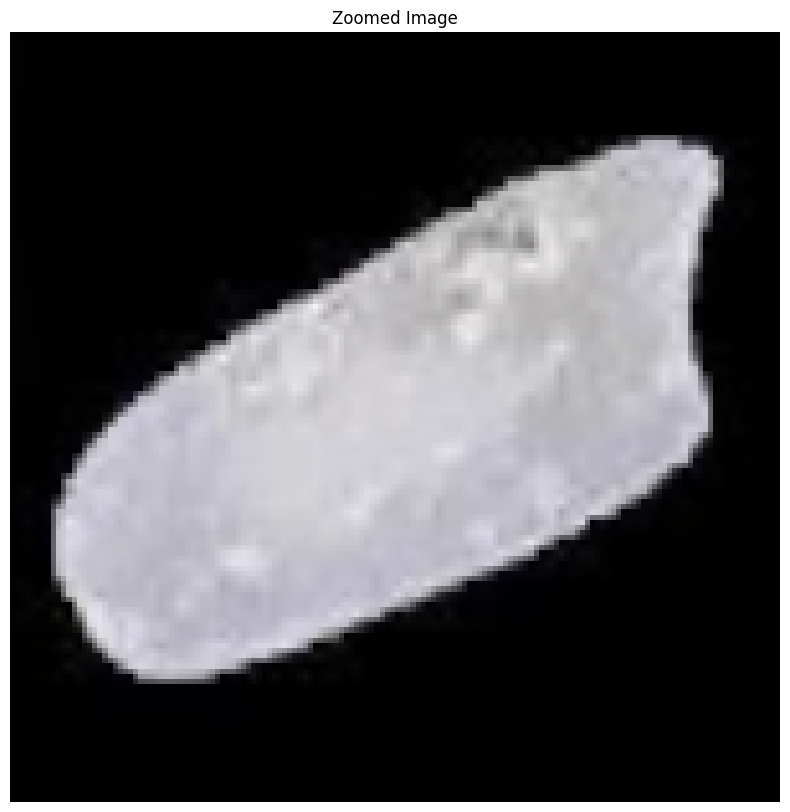

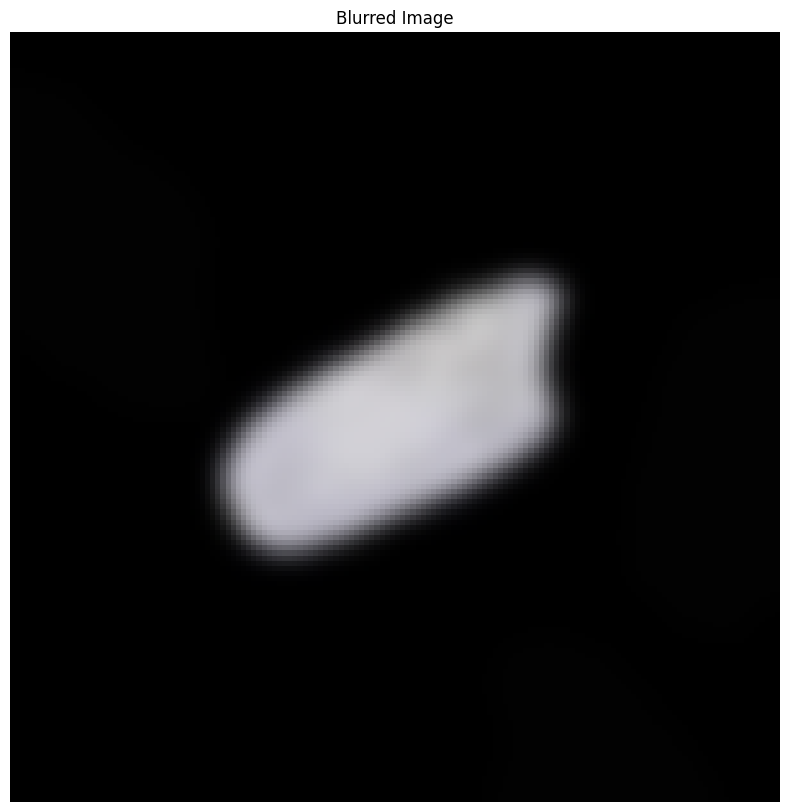

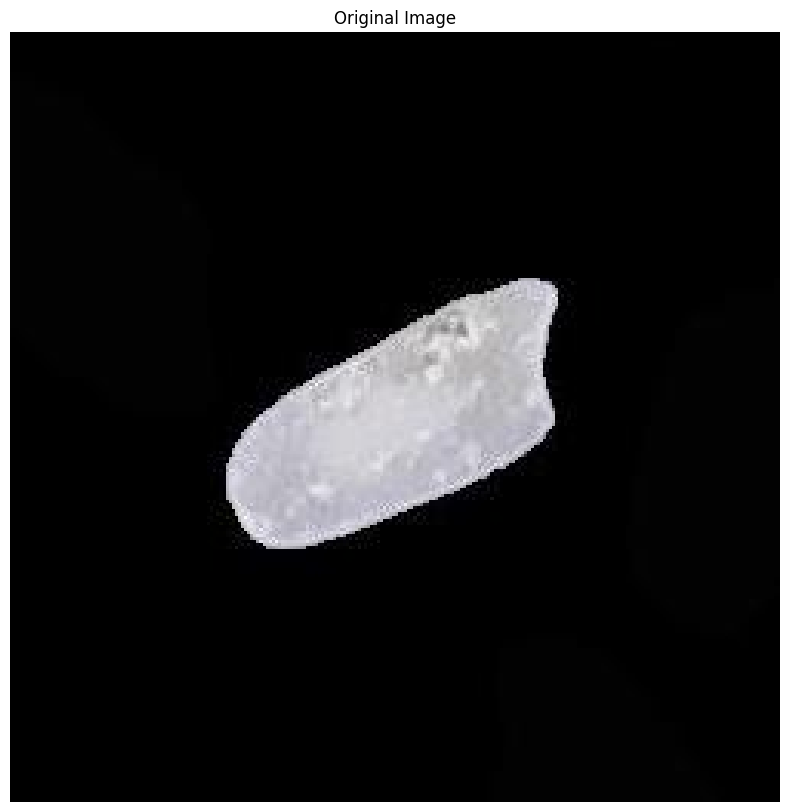

Processing: Arborio (3290).jpg
Original Size: (250, 250)


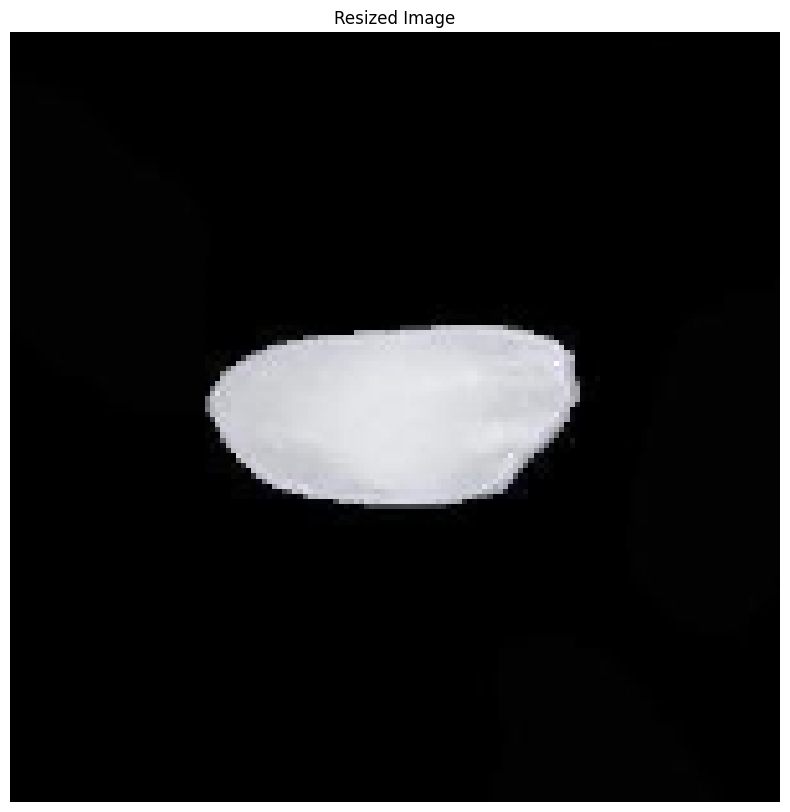

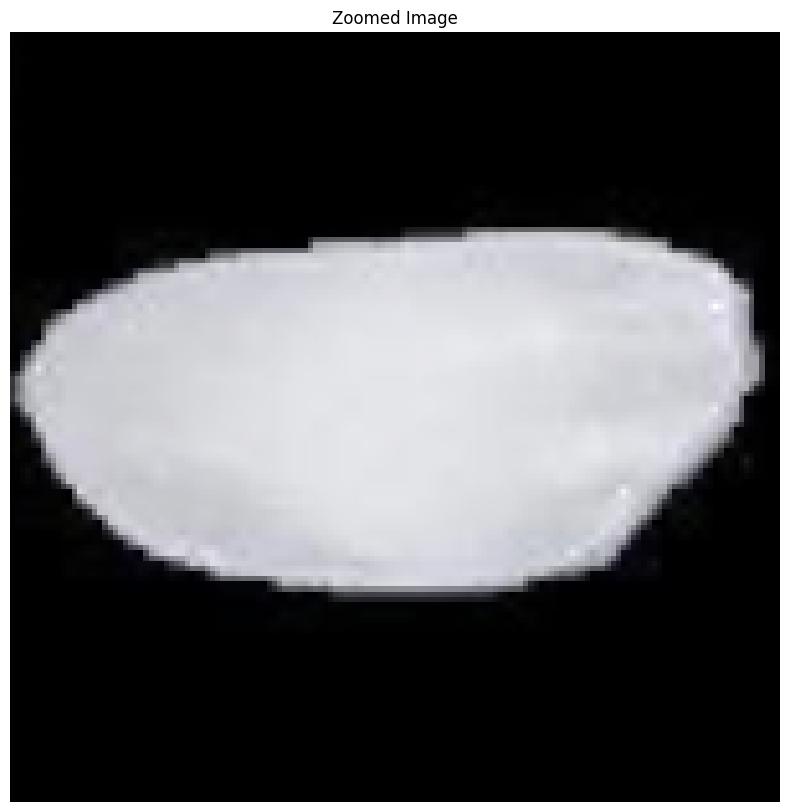

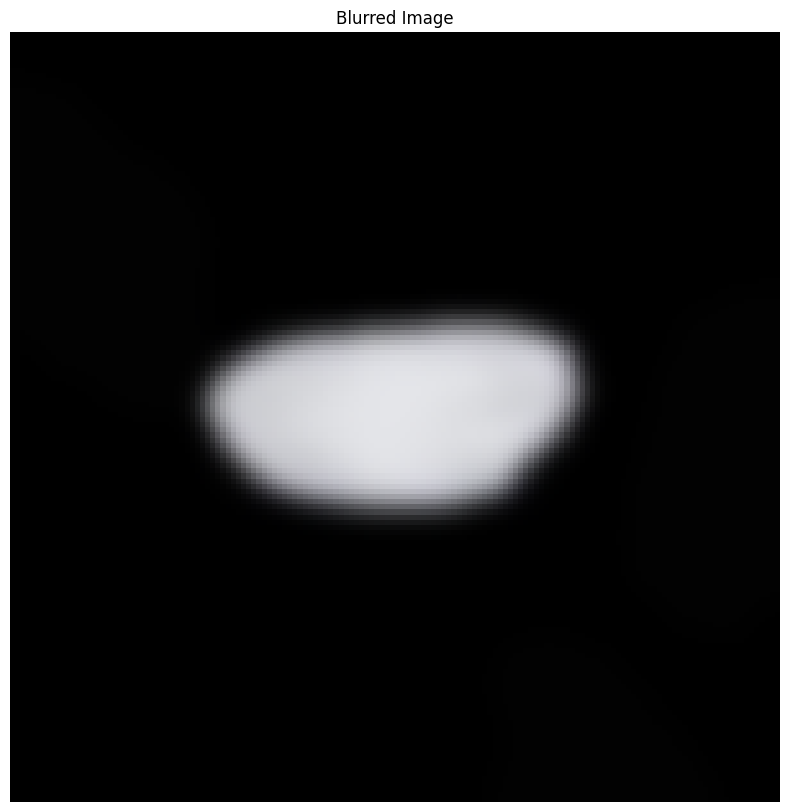

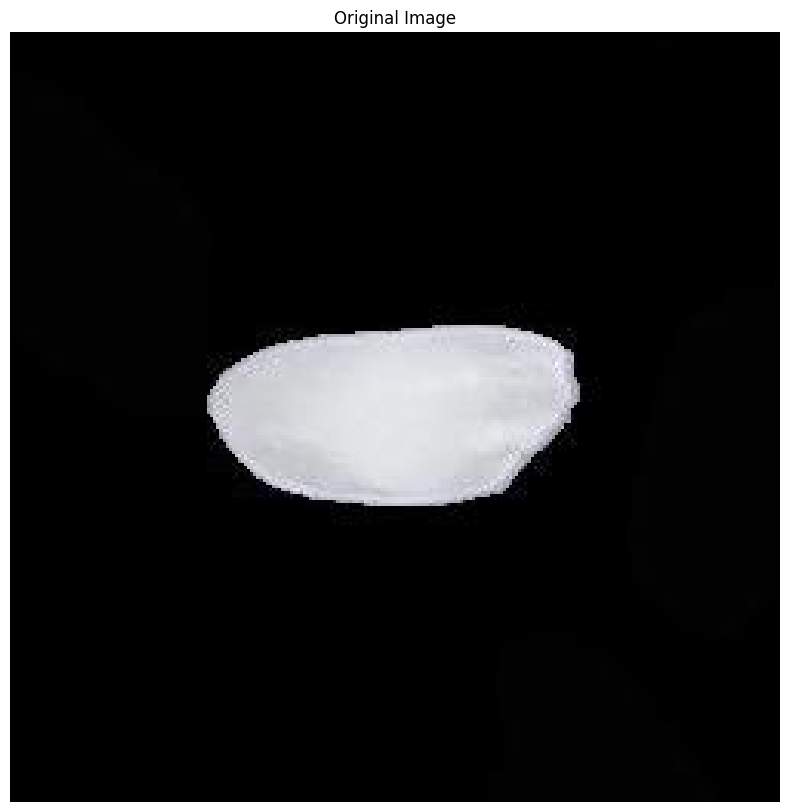

Processing: Arborio (1308).jpg
Original Size: (250, 250)


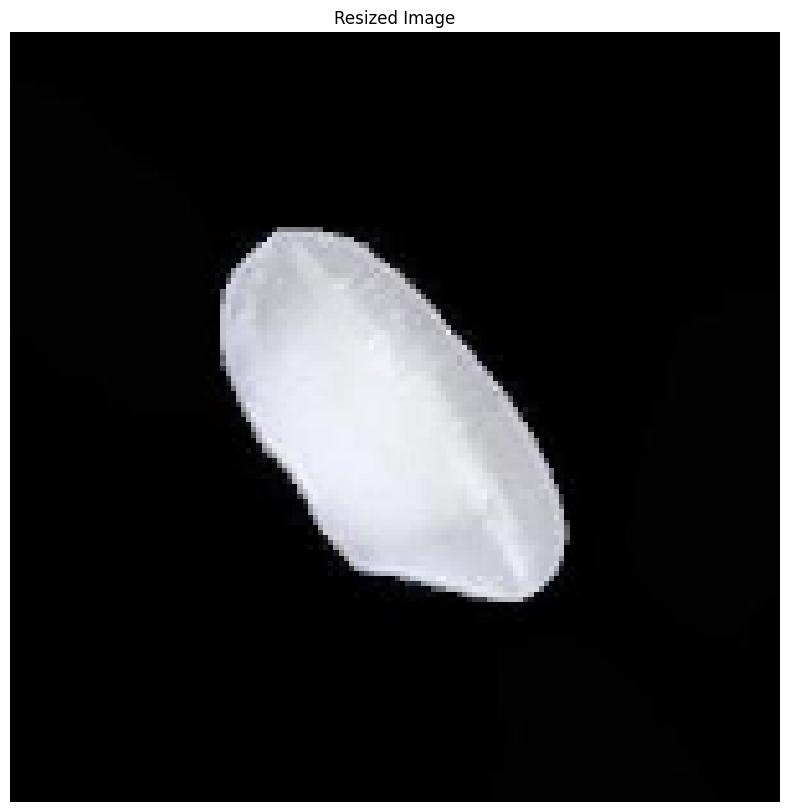

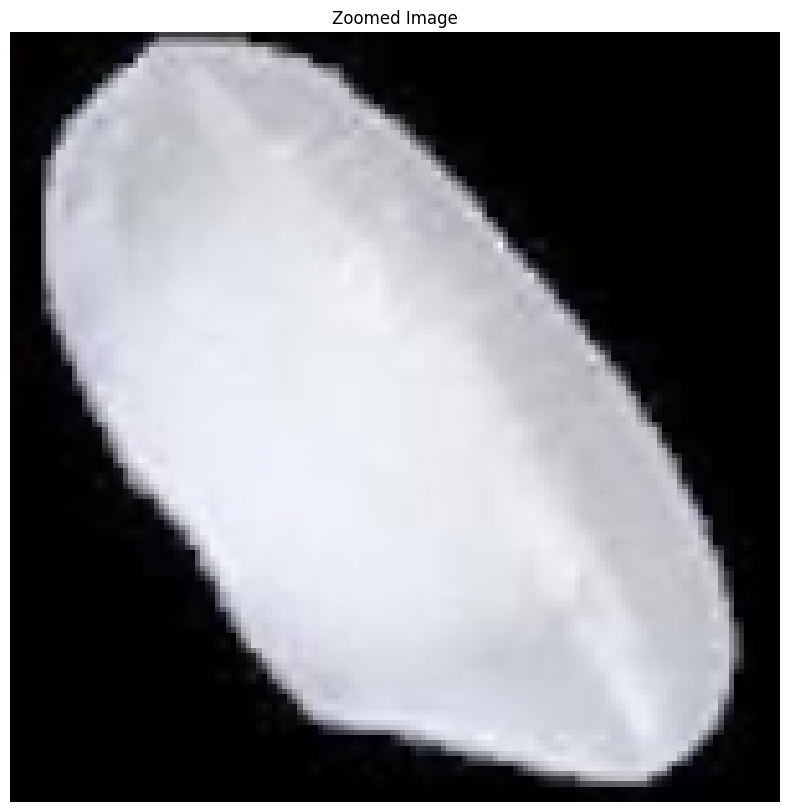

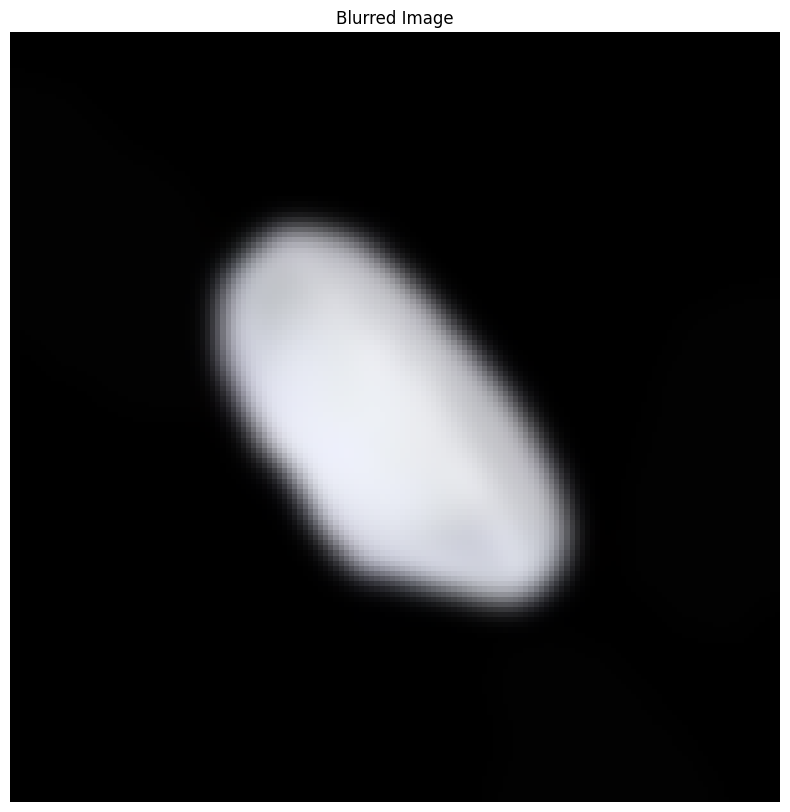

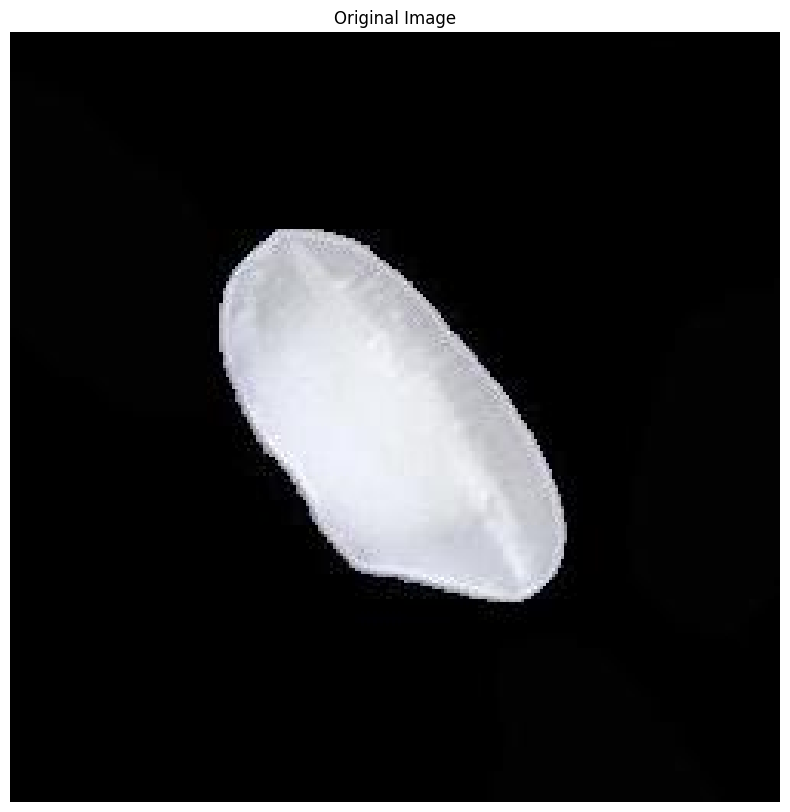

Processing: Arborio (222).jpg
Original Size: (250, 250)


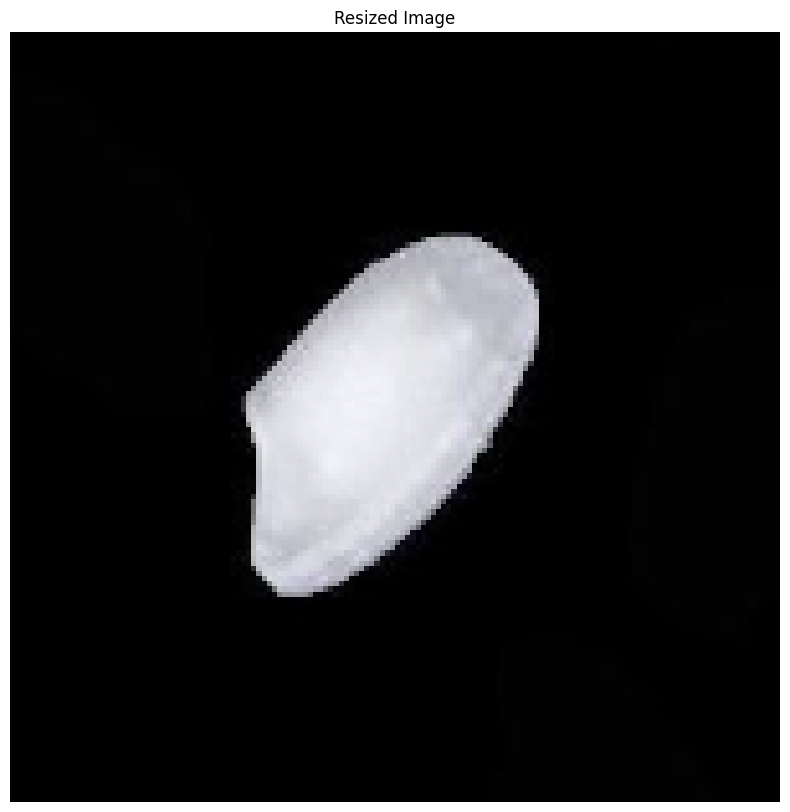

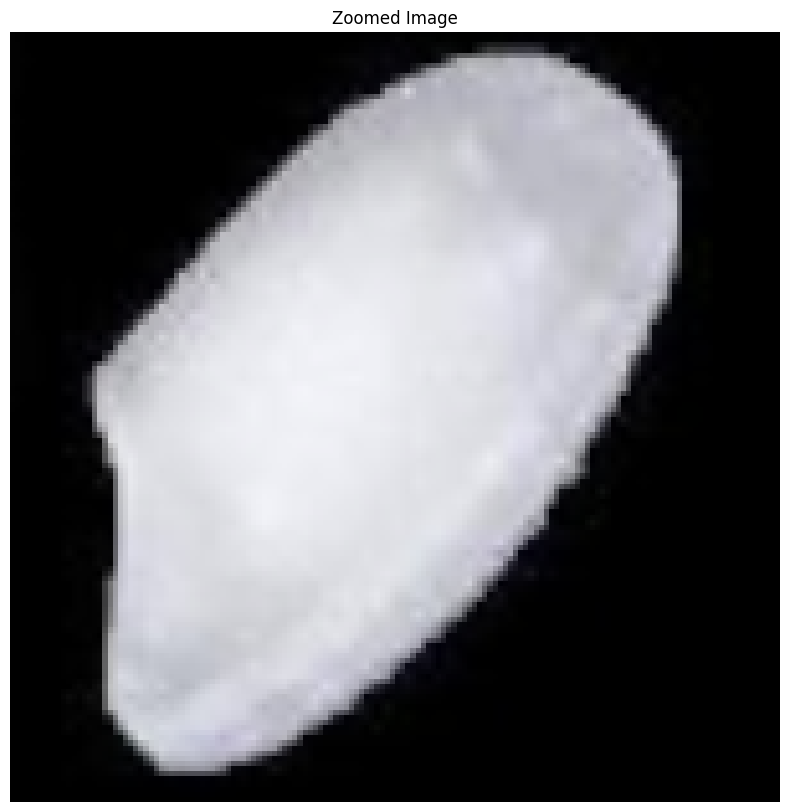

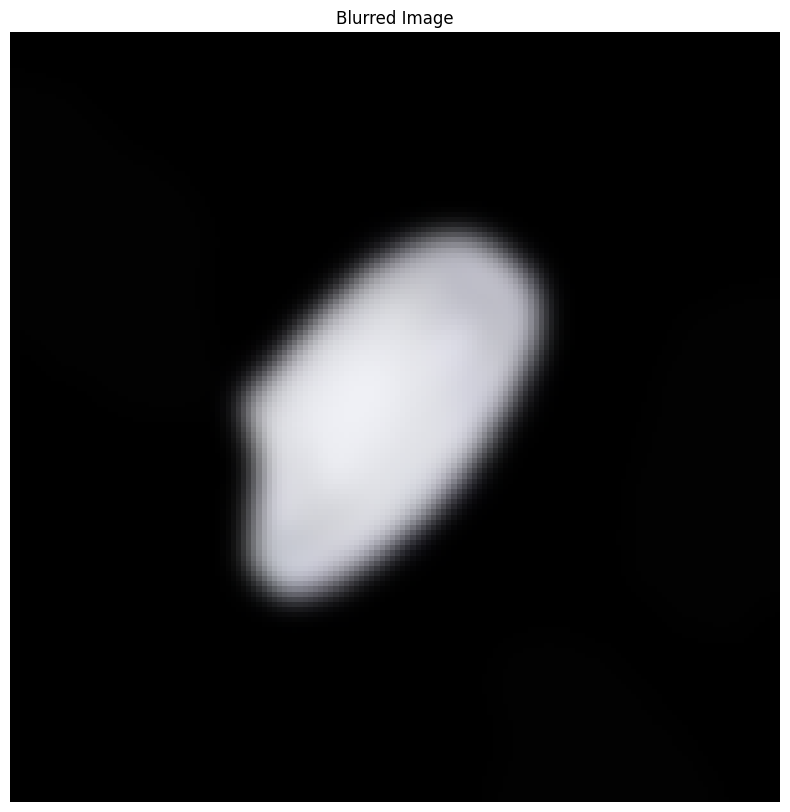

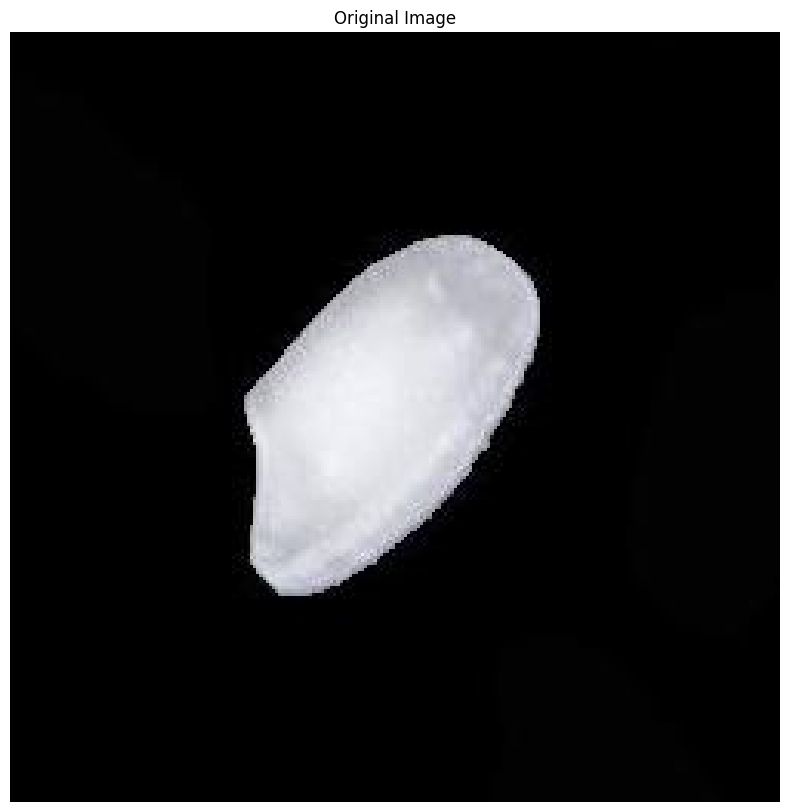

Processing: Arborio (14322).jpg
Original Size: (250, 250)


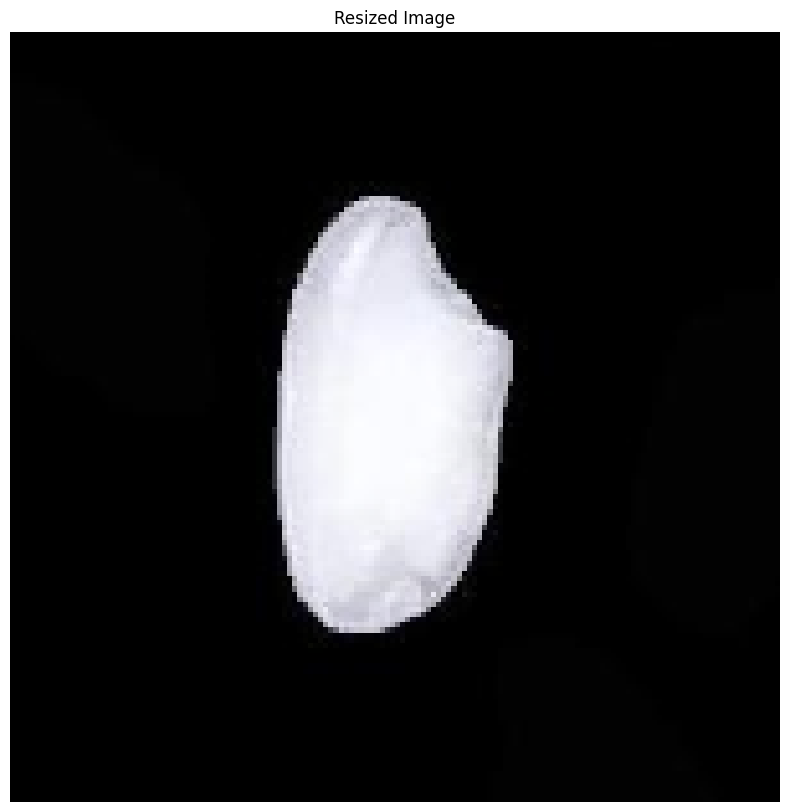

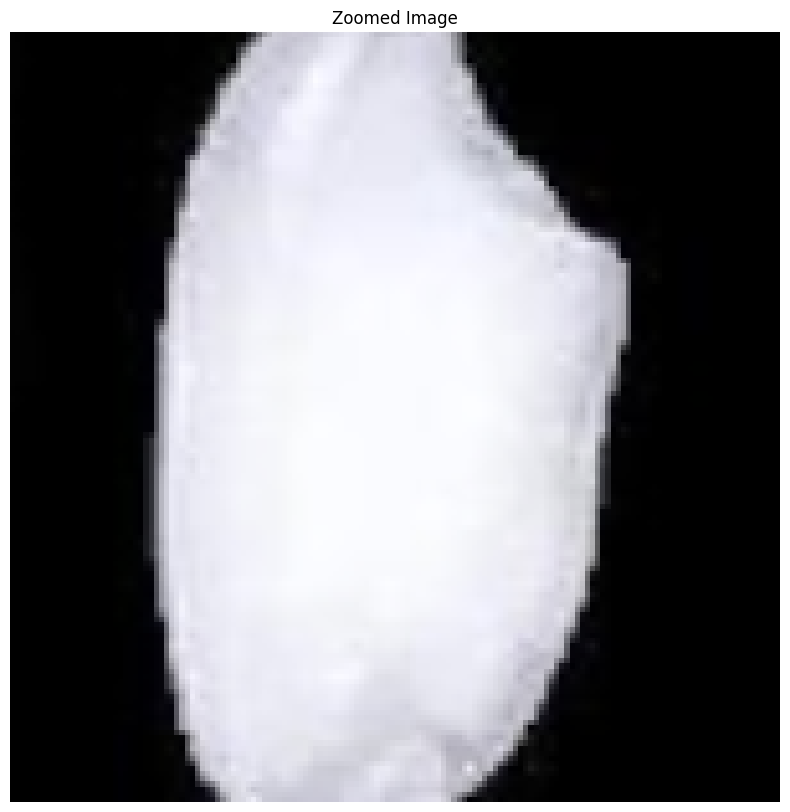

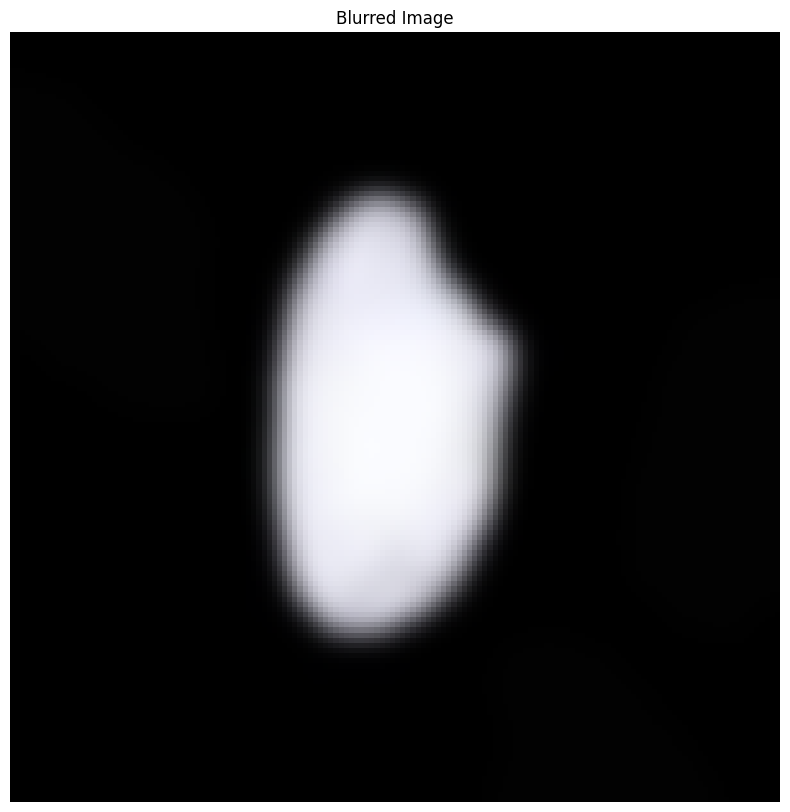

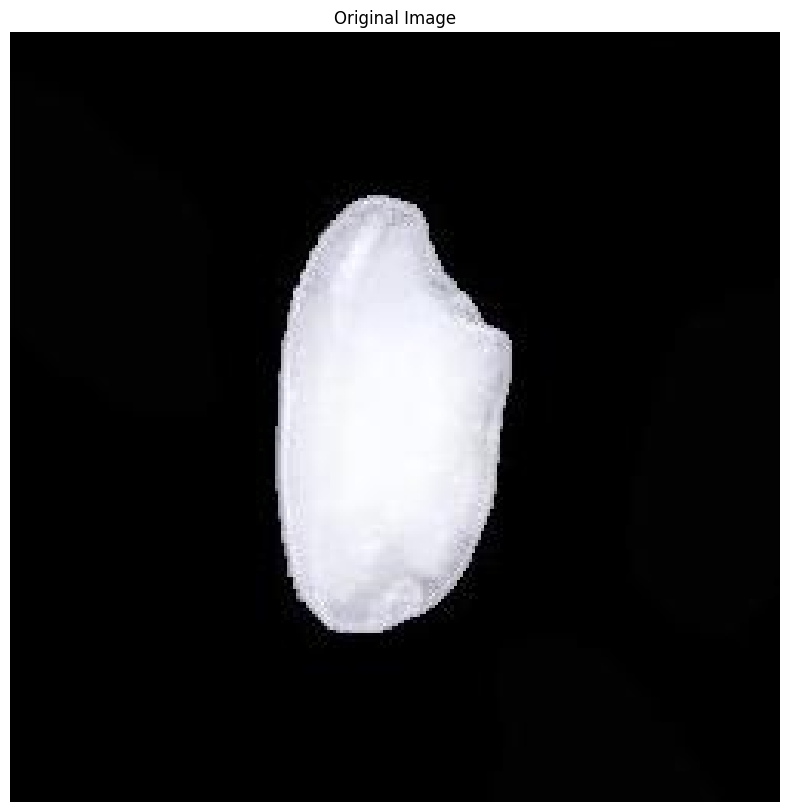

Processing: Arborio (1708).jpg
Original Size: (250, 250)


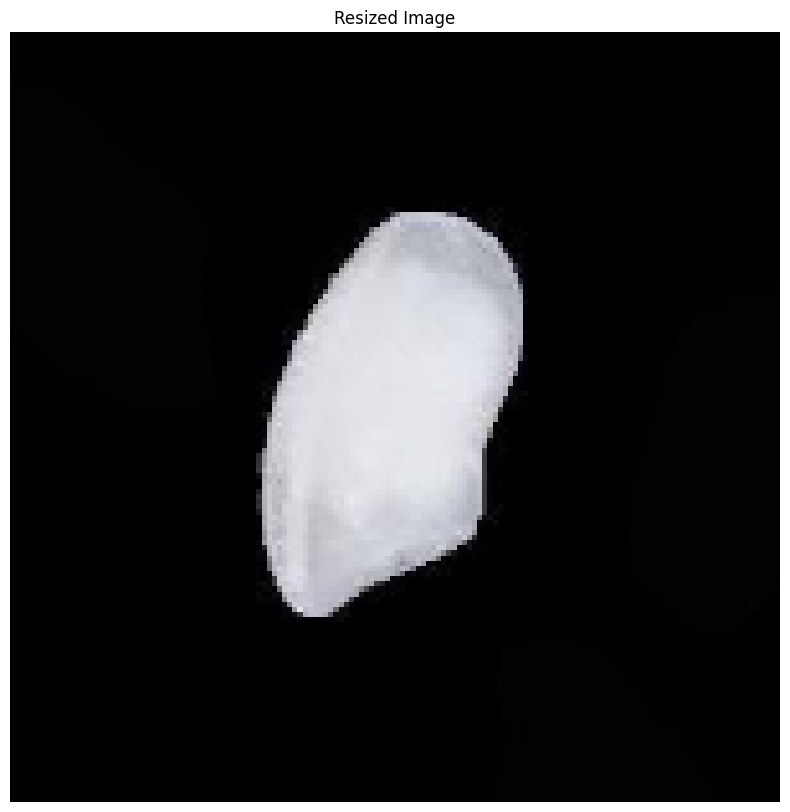

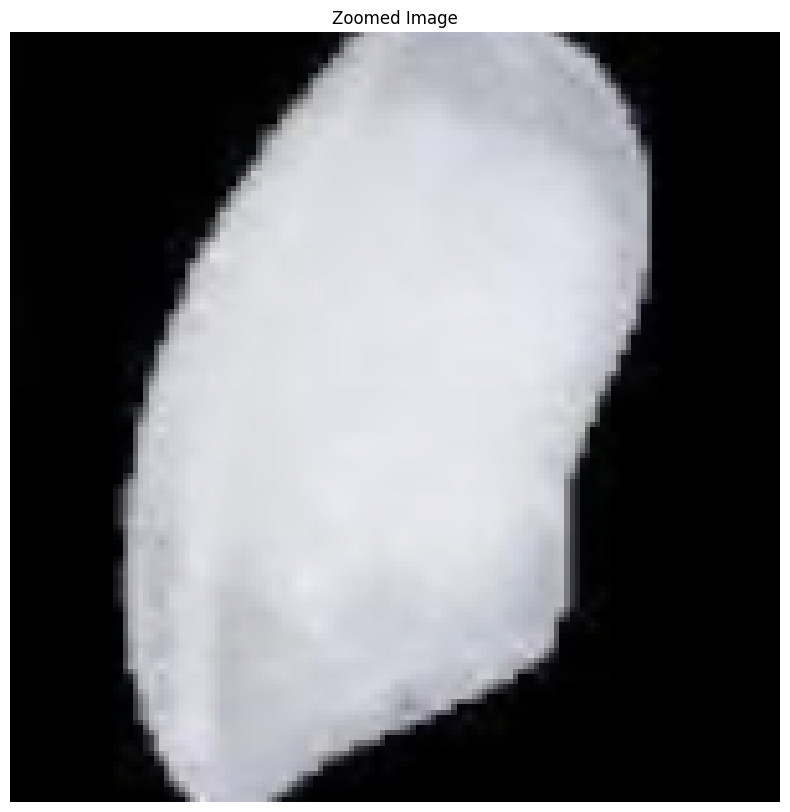

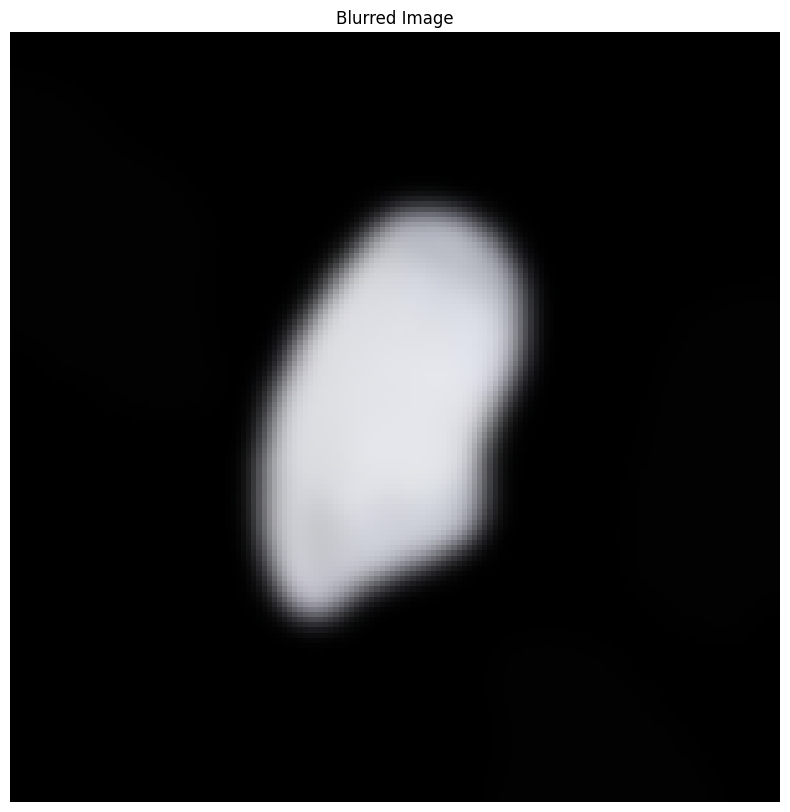

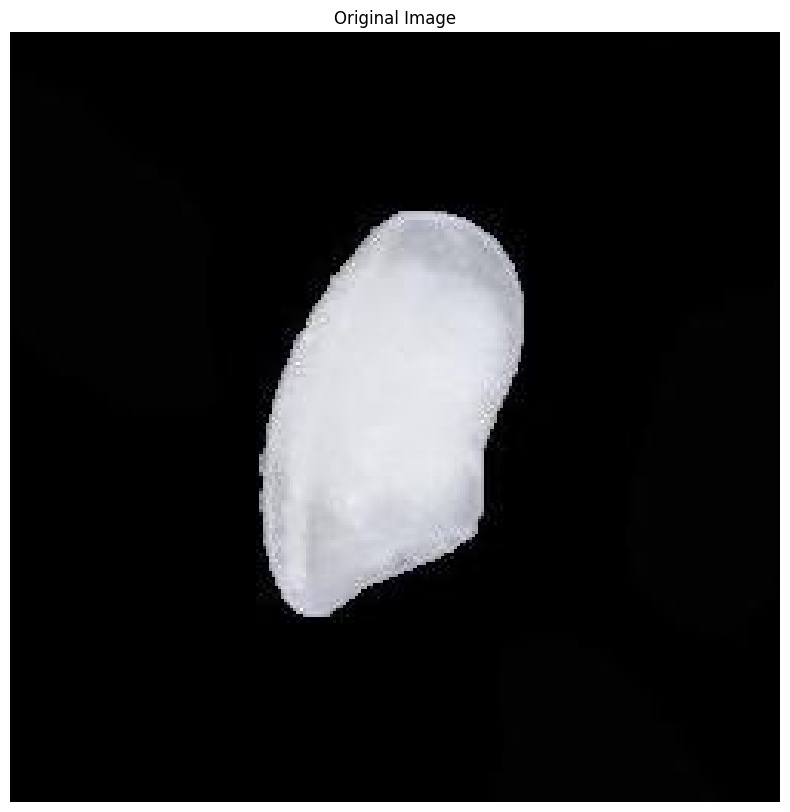

Processing: Arborio (13342).jpg
Original Size: (250, 250)


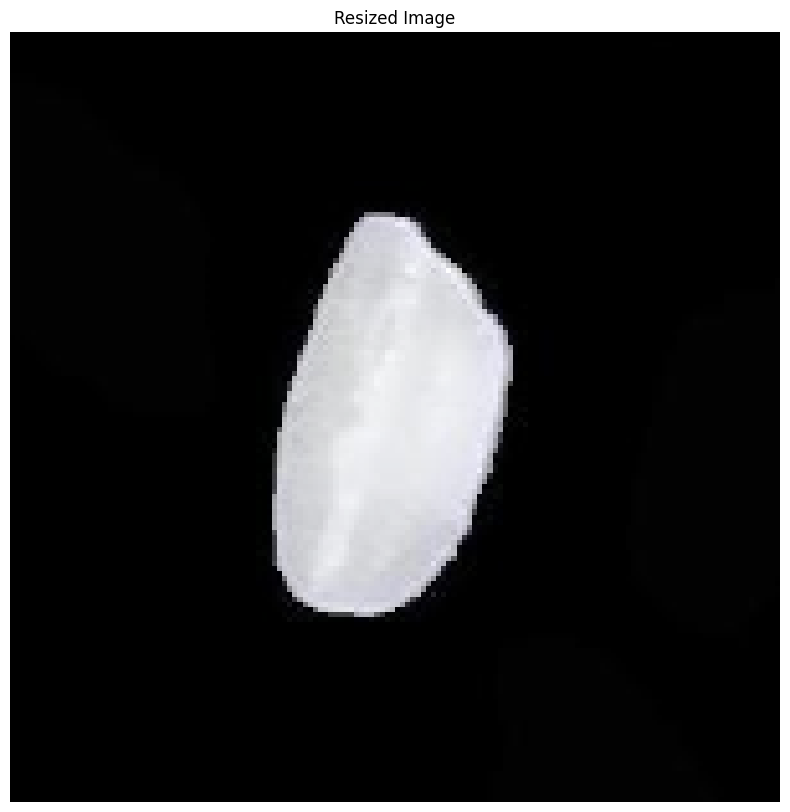

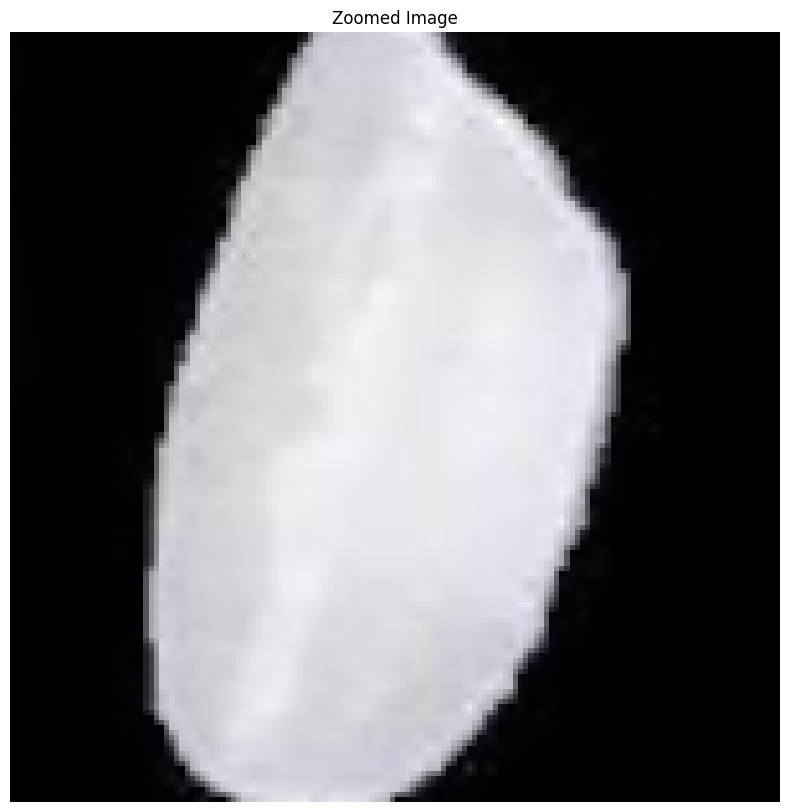

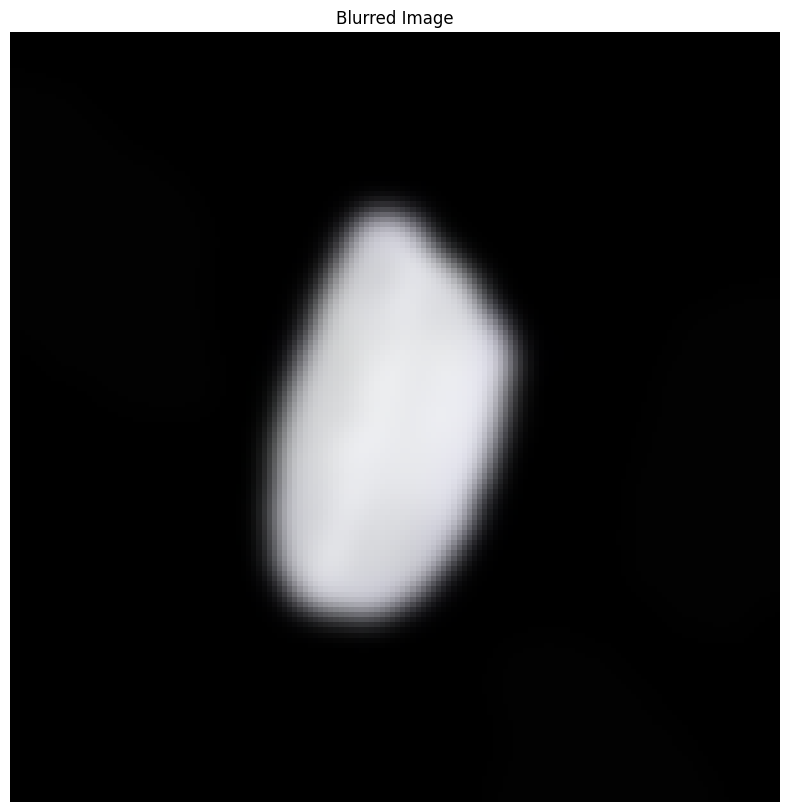

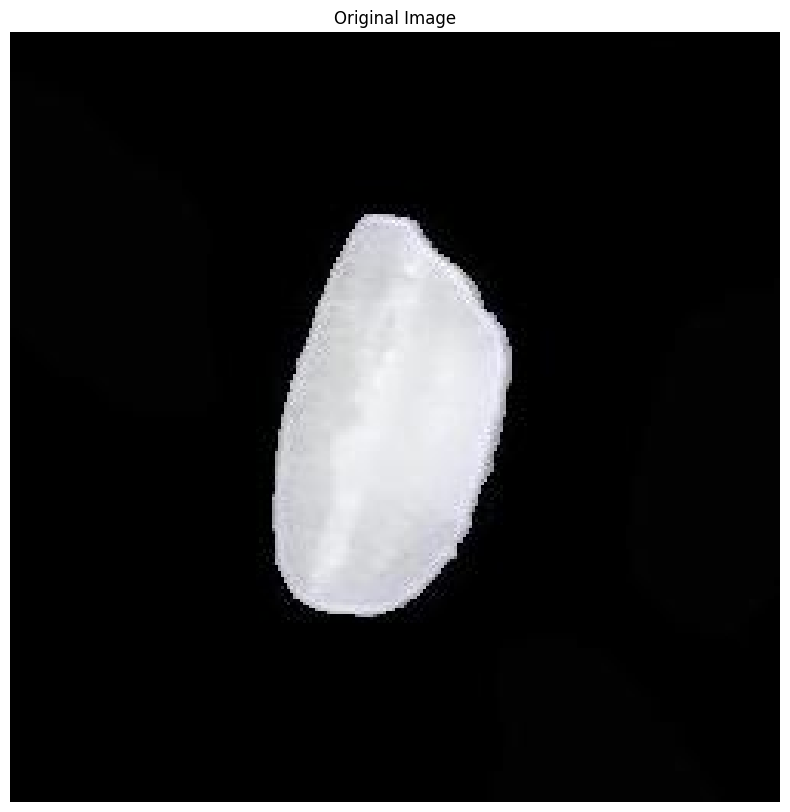

In [ ]:
import os
import zipfile
import cv2

# dataset is in zip format so i use zipfile to extract my images
zip_path = '/content/archive (3).zip'
e = '/content/img'

with zipfile.ZipFile(zip_path, 'r')as zip_ref:
     zip_ref.extractall(e)
     print(os.listdir(e))

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# train directory the extracted images
train_data_dir = e
# Image data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
# Determine the number of classes from the generator
num_classes = train_generator.num_classes

# model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
# model.fit(train_generator, epochs=1, steps_per_epoch=len(train_generator))

# Reading and Displaying Images with OpenCV
img_path = '/content/img/Rice_Image_Dataset/Arborio/Arborio (100).jpg'

# Read the image using cv2
img = cv2.imread(img_path)


# Get image dimensions (height, width, channels)
height, width, channels = img.shape
print(f"Image dimensions: {width}x{height}, Channels: {channels}")

# Import the Colab-specific display function
from google.colab.patches import cv2_imshow
# display the img
cv2_imshow(img)


# Resizing Images
resize_img = cv2.resize(img, (150, 150))

# Display the resized image
cv2_imshow(resize_img)

# Gaussian Blur:

blurred_image = cv2.GaussianBlur(img, (15, 15), 0)
cv2_imshow(blurred_image)

#  Converting to Grayscale

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


import matplotlib.pyplot as plt
# Set Up Paths and Parameters
img_dir = '/content/img/Rice_Image_Dataset/Arborio'
img_files = os.listdir(img_dir)[:20] # Get the first 20 image filenames
resize_dim = (150, 150)  # Resize dimensions
blur_ksize = (15, 15)    # Kernel size for Gaussian blur
zoom_factor = 2          # Zoom factor

# Process and Display Images
def display_img(title, img):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def resize_image(img, size):
    return cv2.resize(img, size)

def zoom_image(img, factor):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 0, factor)  # No rotation, just scaling
    return cv2.warpAffine(img, M, (w, h))

def blur_image(img, ksize):
    return cv2.GaussianBlur(img, ksize, 0)

# Loop through the first 20 images
for image_file in img_files:
    img_path = os.path.join(img_dir, image_file)
    img = cv2.imread(img_path)

    # Print image details
    print(f"Processing: {image_file}")
    print(f"Original Size: {img.shape[:2]}")

    # Resize image
    resized_img = resize_image(img, resize_dim)
    display_img('Resized Image', resized_img)

    # Zoom image
    zoomed_img = zoom_image(resized_img, zoom_factor)
    display_img('Zoomed Image', zoomed_img)

    # Blur image
    blurred_img = blur_image(resized_img, blur_ksize)
    display_img('Blurred Image', blurred_img)

    # Clear (Original Image) - display the original
    display_img('Original Image', img)